### Статистика

        для описания некоторой величины используются два основных типа характеристик: характеристики положения и характеристики разброса. 

#### Мода - характеристика положения

Мода - это значение, которое величина принимает наиболее часто

In [1]:
import pandas as pd

a = pd.Series([1, 4, 1, 6, 7, 1])
mode = a.mode()[0]
print(f'Мода набора данных равна {mode}')

Мода набора данных равна 1


In [2]:
a.mode()    # возвращает серию 

0    1
dtype: int64

Мода  отлично описывает дискретные переменные, но не всегда достаточно хорошо характеризует непрерывные величины. 

пусть набор данных описывает время (в минутах), которое пользователь провёл на сайте: 
2.3, 2.1, 2.4, 2.5, 2. В этом случае мода — каждое значение, так как все они встречаются по одному разу. Поэтому для непрерывных величин чаще, чем мода, используется другая характеристика — **медиана**.

При этом медиана не всегда точно описывает центральную тенденцию

<AxesSubplot: >

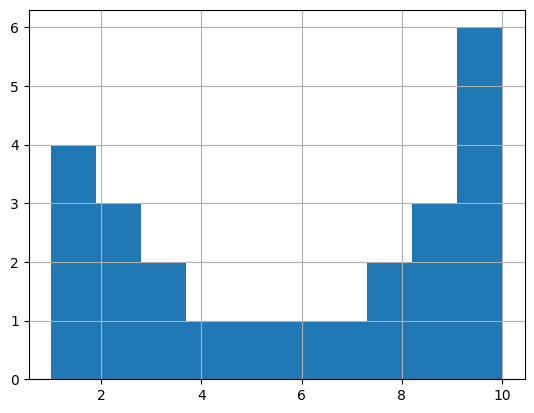

In [3]:
import pandas as pd

data = pd.Series([1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10, 10])
data.hist()

In [4]:
import pandas as pd

data = pd.Series([1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10, 10])
print('Мода набора данных равна', data.mode()[0])
print('Медиана исходного набора данных равна', data.median())
print('Среднее арифметическое набора данных равно', data.mean())

Мода набора данных равна 10
Медиана исходного набора данных равна 6.5
Среднее арифметическое набора данных равно 5.875


        в этом случае центр лучше показало среднее арифметическое, медиана же показала себя менее точно. Исходя из этого, можно сделать вывод, что в случае отсутствия заметных выбросов на гистограмме, наиболее высокой точностью обладает среднее арифметическое. Мода используется для демонстрации «вершины» гистограммы, а не центральной тенденции.

#### Дисперсия

По сути это сумма квадратов отклонений каждого элемента от среднего арифметического, деленного на число элементов

In [5]:
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5, 6])

mean = data.mean()
var = 0
for i in data:
	var += (i - mean) * (i - mean)
var /= len(data)

print(var)

2.9166666666666665


#### Стандартное отклонение

это всего лишь величина, отражающие отклонение в тех же единицах измерения - поэтому корень из дисперсии

In [6]:
import pandas as pd

data = pd.Series([1, 2, 3, 4, 5, 6])

mean = data.mean()
var = 0
for i in data:
    var += (i - mean) * (i - mean)
var /= len(data)
std = var**0.5 # извлекаем корень

print(std)

1.707825127659933


#### Квартили и процентили

Размах набора данных — это разница между максимальным и минимальным значениями набора данных.

In [7]:
import pandas as pd

x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8]) # набор данных

range_value = x.max() - x.min() # размах
print(range_value)

7



Размах — это, конечно, хорошо, но у него есть существенный недостаток: большая чувствительность к выбросам. Если бы набор данных, который мы рассматриваем как пример, выглядел как 

3, 1, 2, 5, 1000, то размах этого набора данных был бы 

1000−1=999, что недостаточно хорошо характеризует полученный набор. Поэтому, чтобы точнее описать разброс данных, существует другая структурная характеристика — **межквартильный размах.**

Межквартильный размах — это размах половины значений набора данных, которые находятся вокруг медианы. Это ближайшие к медиане значения: 
25 % меньше неё и 25 % больше.

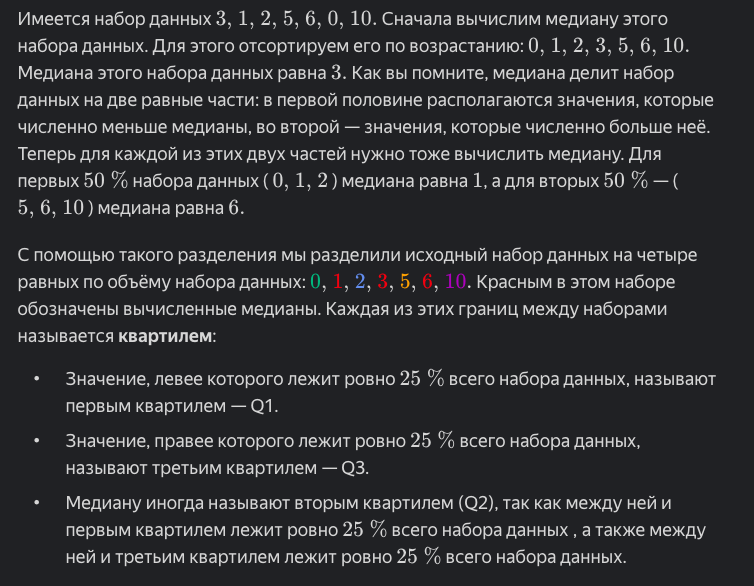

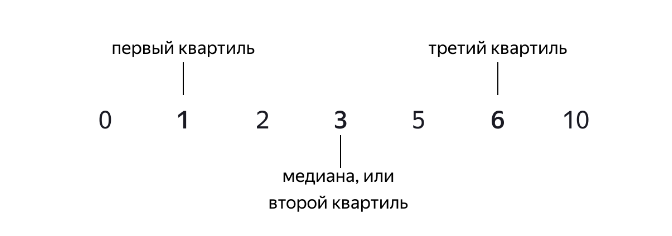

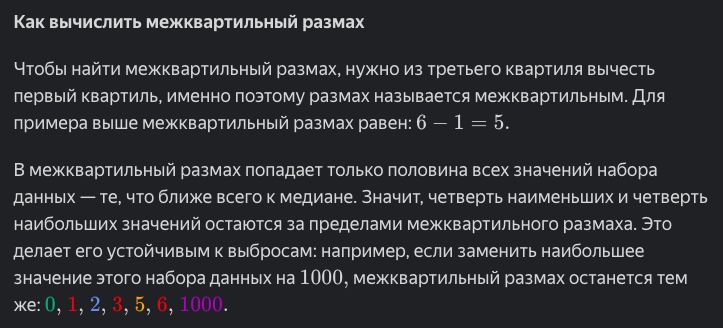

In [8]:
data_1 = pd.Series([17, 4, 4, 1, 7, 5, 8, 6, 15, 3])
data_1.describe()

count    10.000000
mean      7.000000
std       5.163978
min       1.000000
25%       4.000000
50%       5.500000
75%       7.750000
max      17.000000
dtype: float64

In [11]:
import pandas as pd
from scipy import stats # подключение модуля stats из библиотеки scipy

iqr_value = stats.iqr(data_1) # межквартильный размах
print(iqr_value)

3.75


Процентилем некоторого уровня (p-м процентилем) называют значение из набора данных, меньше которого ровно p % элементов всего набора данных.

квартили — это частные случаи процентиля. Поскольку первый квартиль — это значение, левее которого лежит ровно 
25 % всего набора данных, то первый квартиль также можно называть 25-м процентилем. Аналогично медиана — это 50-й процентиль, а третий квартиль — это 75-й процентиль.

Процентили нужны в случаях, когда нужно найти значение из набора данных, которое отделяет определённую часть всего набора. Например, если нужно найти «возраст сотрудников компании, меньше которого ровно 
**33 %** всех сотрудников». Именно такая универсальность и делает процентиль мощным инструментом в руках любого математика

In [12]:
import pandas as pd
import numpy as np

x = pd.Series([3, 1, 2, 5, 6, 0, 10])

data_percentile = np.percentile(x, 10) # 10-й процентиль
print(data_percentile)

0.6000000000000001


Проще говоря, чтобы вручную найти нужный процентиль (например, 33%) из имеющегося набора данных (без использования интерполяции):

- берем количество элементов - пусть их будет 100
- считаем что такое 33 процента - это значит 33 значения из 100 должны быть меньше некого значения процентиля
- сортируем по возрастанию, находим 33й элемент этого списка - собственно это и есть 33й процентиль

а вот в Python значение процентиля вычисляется приближённо, причём методы расчёта могут быть разными. По умолчанию в NumPy используется линейная интерполяция (method='linear')

    Различия при расчёте межквартильного размаха

Вернёмся к разным способам расчёта межквартильного размаха для набора данных 
3, 1, 2, 5, 6, 0, 10. Напомним: в одном случае мы выбирали значения квартилей из датасета, а во втором — использовали функцию stats.iqr().

Функция stats.iqr() считает межквартильный размах как разницу между 
75-м и 
25-м процентилями, рассчитанными с интерполяцией. Воспроизведём логику работы функции:

In [13]:
import pandas as pd
import numpy as np
from scipy import stats

x = pd.Series([3, 1, 2, 5, 6, 0, 10])
p25 = np.percentile(x, 25)
print('25-й процентиль с интерполяцией:', p25)
p75 = np.percentile(x,75)
print('75-й процентиль с интерполяцией:', p75)

difference = p75 - p25
print('Разница между 75-м и 25-м процентилями:', difference)

iqr_value = stats.iqr(x) # межквартильный размах
print('Межквартильный размах:', iqr_value)

25-й процентиль с интерполяцией: 1.5
75-й процентиль с интерполяцией: 5.5
Разница между 75-м и 25-м процентилями: 4.0
Межквартильный размах: 4.0


In [15]:
pd.Series([3, 1, 2, 5, 6, 0, 10]).describe()

count     7.000000
mean      3.857143
std       3.436499
min       0.000000
25%       1.500000
50%       3.000000
75%       5.500000
max      10.000000
dtype: float64

    Использовать интерполяцию или нет, вот в чём вопрос. 

Способ с интерполяцией считается более точным: без неё не учитывается, насколько далеко друг от друга находятся значения из датасета. Например, без интерполяции третий квартиль (или 
75
75-й процентиль) набора данных 
0,1,2,3,4,15,16 будет равен 
15, а с интерполяцией — 
9.5. <font color='red'>Интерполяция помогает лучше охарактеризовать данные.</font> 

Чем больше данных, тем меньше станут промежутки между отдельными значениями по сравнению с размахом набора данных. Также и относительная разница между процентилями, посчитанными с интерполяцией и без, станет не так ощутима.

#### Диаграмма размаха

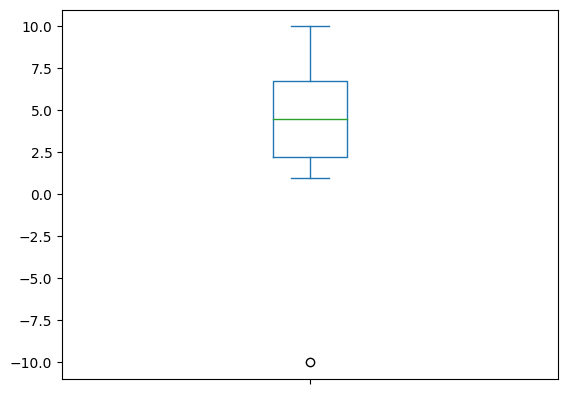

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

x = pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]) # набор данных

ax = x.plot.box()
plt.show()

In [17]:
pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]).describe()

count    10.000000
mean      3.600000
std       5.521674
min     -10.000000
25%       2.250000
50%       4.500000
75%       6.750000
max      10.000000
dtype: float64

In [18]:
# считаем межквартильный размах вручную
stats.iqr(pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]))

4.5

это действительно значение между 25 и 75 процентилями

    «Усы» ограничиваются минимальным и максимальным значениями внутри интервала 
    [Q1 −1.5 межквартильного размаха; Q3 +1.5 межквартильного размаха]. 

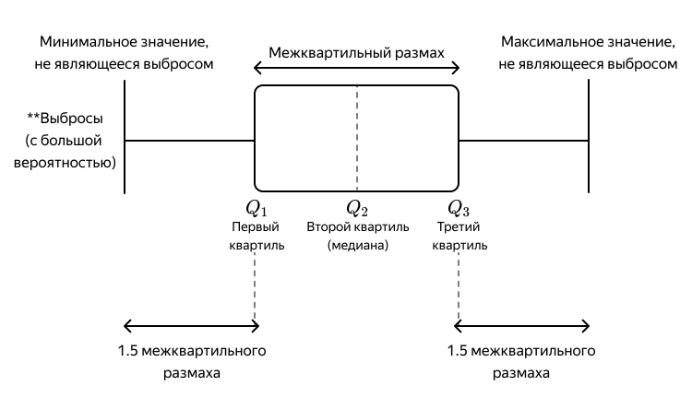

In [21]:
# считаем размер усов вручную
print(f'размер уса равен полтора межквартильного размаха = {4.5*1.5}')

print(f'нижняя граница усов = последняя базовая величина, которая не меньше {2.25 - 4.5*1.5}')

print(f'верхняя граница усов  = последняя базовая величина, которая не больше {6.75 + 4.5*1.5}')

размер уса равен полтора межквартильного размаха = 6.75
нижняя граница усов = последняя базовая величина, которая не меньше -4.5
верхняя граница усов  = последняя базовая величина, которая не больше 13.5


In [22]:
# смотрим что это за величины в наборе данных
pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]).sort_values()

0   -10
1     1
2     2
3     3
4     4
5     5
6     6
7     7
8     8
9    10
dtype: int64

значит нижняя граница усов - это 1, верхняя граница - это 10

проверим еще раз на графике

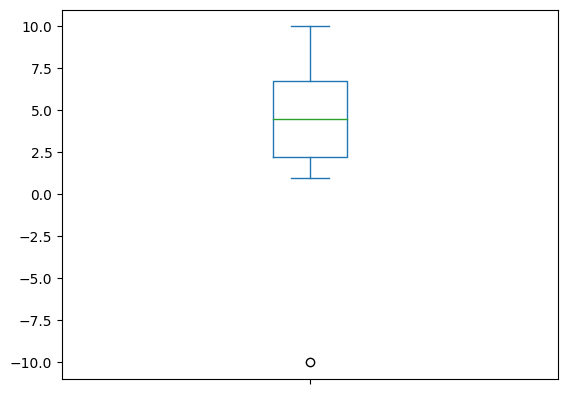

In [25]:
pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]).plot.box()
plt.show()

все верно, а значение -10 это выброс

<AxesSubplot: >

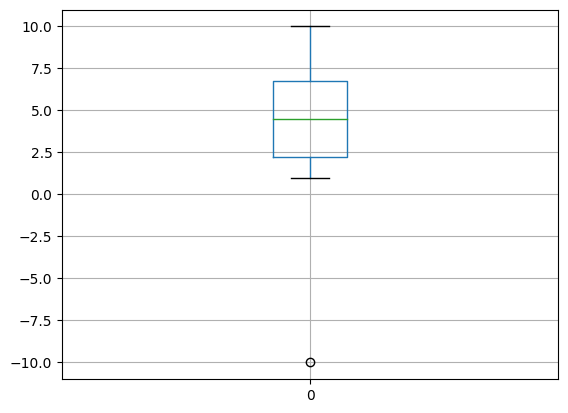

In [28]:
# еще способ построить boxplot 
pd.Series([-10, 1, 2, 3, 4, 5, 6, 7, 8, 10]).reset_index().boxplot(column=0)

#### Столбчатая диаграмма

Диаграмма размаха показывает, как расположены данные и их разброс, но она не всегда достаточно информативно описывает, как данные распределены между собой. 

Для представления на графике непрерывных величин часто используется гистограмма, но она не подходит для изображения дискретных величин. Если описывать их таким образом, могут возникнуть большие пустые интервалы на графиках. Так как дискретные величины могут принимать только определённое число значений, то для них придумали Столбчатую диаграмму, демонстрирующую частоту данных и то, как расположены данные между собой

    Таблица частот показывает, как часто каждый элемент встречается в полученном наборе данных.

In [29]:
import pandas as pd

data = pd.Series([1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 5]) # данные

print(data.value_counts())

3    4
1    3
4    2
2    1
5    1
dtype: int64


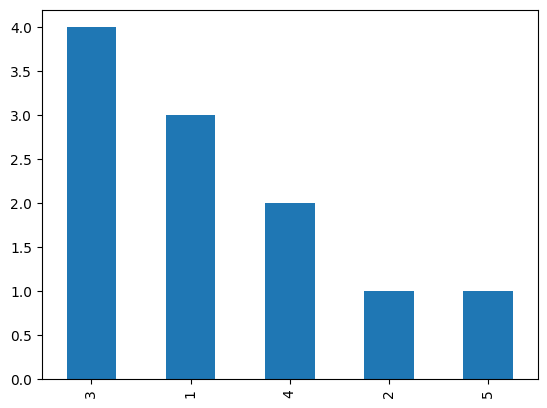

In [30]:
# на основе таблицы частот строим столбчатую диаграмму
import pandas as pd
import matplotlib.pyplot as plt

data = pd.Series([1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 5]) # данные
freqs = data.value_counts()

ax = freqs.plot.bar()
plt.show()

Столбчатая диаграмма хорошо отражает распределение  <font color='red'>дискретных</font> значений набора

        столбчатая диаграмма не подходит для отображения непрерывных величин. 

Но как тогда быть с непрерывными величинами? Для них можно построить <font color='red'>гистограмму </font>.

#### Гистограмма 

        Количество корзин при построении гистограммы очень важно: 

        Число корзин определяет точность, с которой мы хотим построить гистограмму. Если достаточно низкой точности и важнее показать самый популярный интервал, то следует использовать параметр bins с малым значением. Но если нужно тщательно проанализировать ситуацию, найти выбросы или малейшие отклонения частот друг от друга, стоит использовать параметр bins с большим значением. К сожалению, универсального ответа «что такое малое/большое значение» нет, и для каждого случая их придётся подбирать методом проб и ошибок.

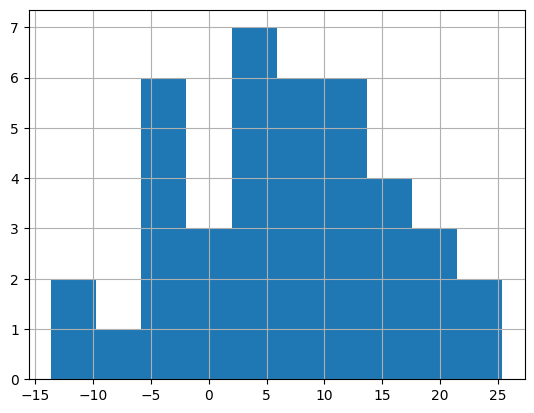

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

times = pd.Series([4.38, 19.27,   7.60,   9.65,   0.20,
   4.65,  -5.63, -13.64,  10.59,  12.90,
   6.88, 16.79,   4.54,   5.46, 5.72,
 -10.90, 2.79, -7.46, 14.90, 25.34,
   9.39, -5.72, -0.95, 14.31, 1.72,
   7.27,  18.62, 21.01, 5.66, 10.26,
  10.90,  7.64, 25.38, 10.36, -3.73,
  10.80, -5.53, 15.16, -2.95, -3.69]) # данные

times.hist()
plt.show()

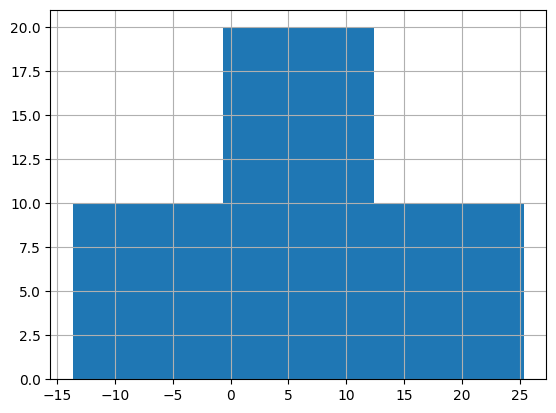

In [42]:
times.hist(bins=3)
plt.show()

Малое число корзин позволяет найти <font color='red'>наибольший интервал</font>  часто встречающихся значений

Большое число корзин позволяет определить <font color='green'>наиболее часто встречающееся значение</font>  и определить <font color='green'>выбросы</font> 

#### Плотность гистограммы 

особенность в том, что частоту, с которой значения попадают в интервал, показывают не высотой столбца, а площадью интервала. 

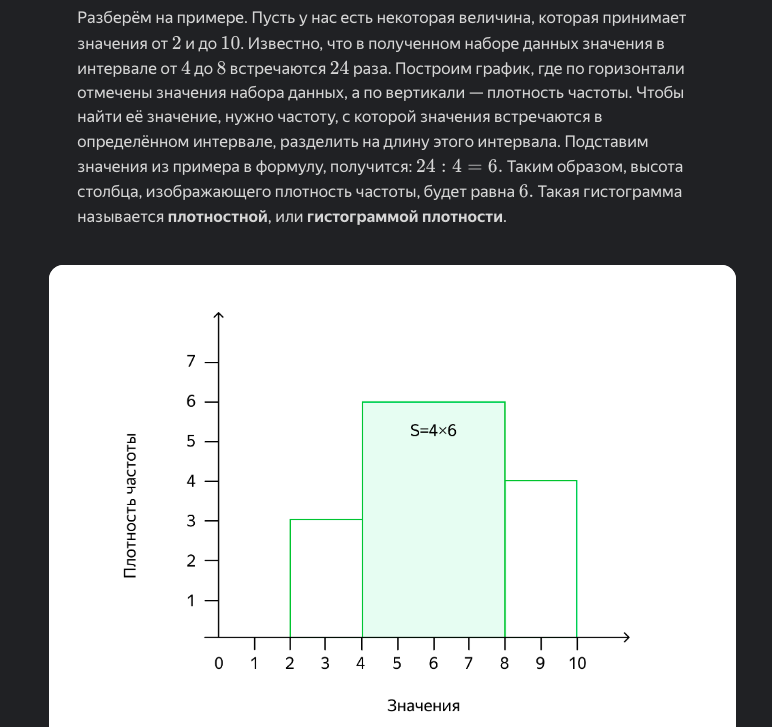

        Гистограмма плотностей — более удобный и универсальный инструмент в работе с непрерывными переменными, чем обычная гистограмма. У последней есть существенный недостаток: чем шире столбец, тем больше значений в него попадает, а значит, больше высота этого столбца.

По гистограмме плотностей можно оценить, сколько значений попало в любой интересующий нас интервал, не только тот, что выбран для построения графика. 

Для этого нужно взять два любых значения набора данных и <font color='red'>вычислить площадь частоты</font>, с которой значения попадают в этот интервал. Получившееся число и будет оценкой того, сколько значений попало в интервал.

Пример: известно время , которое каждый пользователь тратит на регистрацию на сайте

Строим график плотности частоты времени регистрации.

Сколько примерно пользователей тратит на регистрацию больше 18 минут?

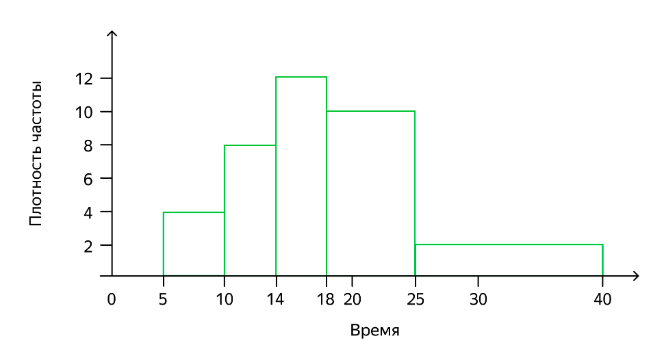

больше 18 минут - это два прямоугольника правее отметки 18. 

Считаем их площадь - (25-18)х 10 + (40- 25)х 2 = 100

### Случайные величины

         Случайная величина — переменная, которая хранит исход некоторого случайного эксперимента в виде числа. В результате эксперимента случайная величина может принимать только одно значение.

#### Таблица распределения случайной дискретной величины


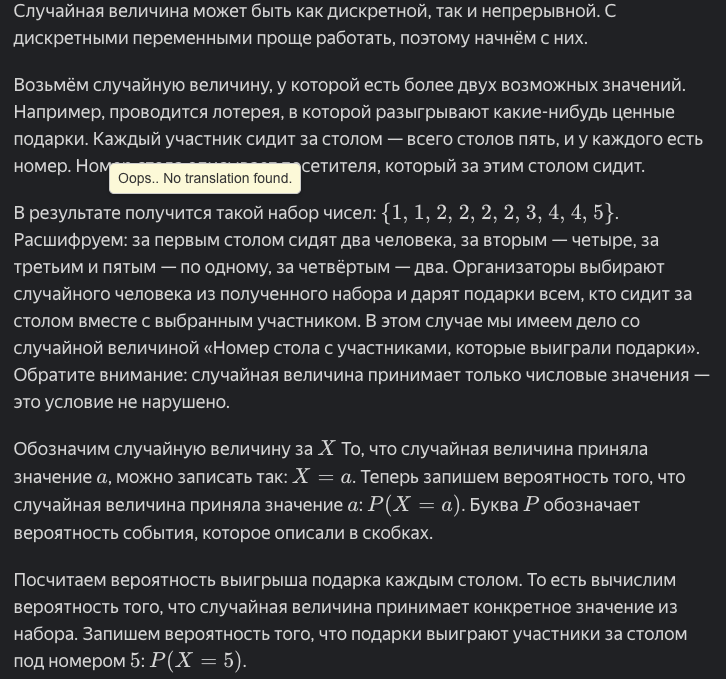

Таблица распределения вероятностей для каждого стола будет выглядеть так:

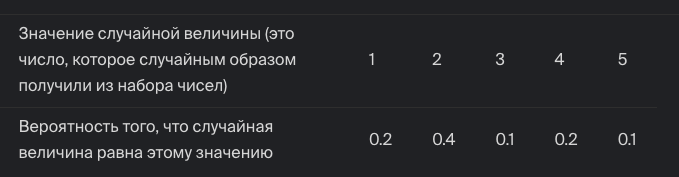

        Таблица распределения случайной дискретной величины — это таблица, которая хранит все значения, которые может принимать случайная величина, и вероятности, с которыми она эти значения принимает

        Чтобы вычислить вероятность того, что случайная величина примет значения из промежутка 
        [a, b], необходимо сложить все вероятности величин, которые может принимать случайная величина и которые лежат в промежутке 
        [a, b].

#### Кумулятивная функция

Кумулятивной функцией вероятности называется функция F(x), которая в каждой точке показывает вероятность того, что P(X⩽x).

На примере кафе график кумулятивной функции (накопительной) выглядит так: 

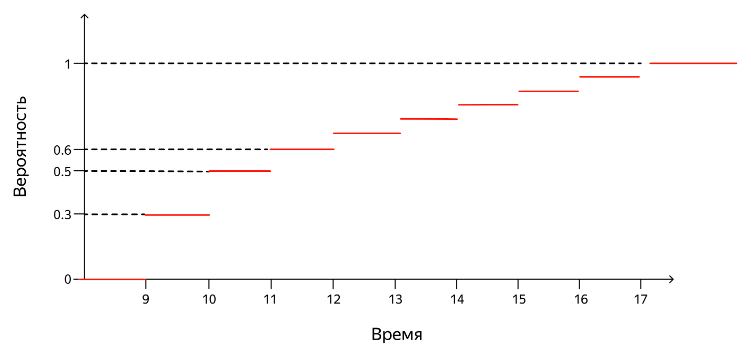

Вытекающие свойства:

- начинается из нуля (с нулевой вероятности)
- не может быть отрицательной
- не может быть убывающей (от значения к значений накопительный эффект)
- конечное значение - всегда единица (складывая или накапливая вероятности конечным значением всегда будет 1)

#### Математическое ожидание дискретной случайной величины

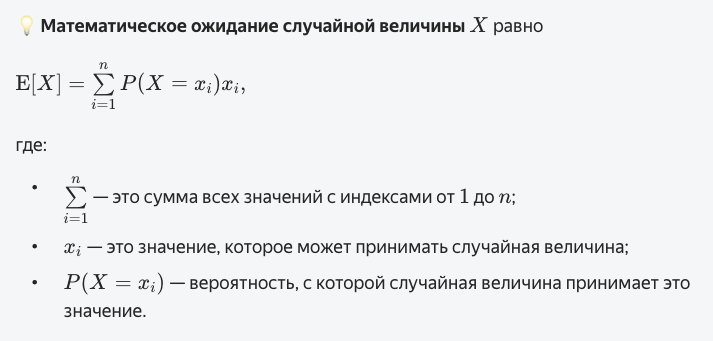

        Математическое ожидание — важная концепция в анализе случайных величин. Оно позволяет понять, к чему приближается среднее значение случайной величины в случае, если повторений будет бесконечно много

        закон больших чисел: для его выполнения нужно бесконечное количество повторений, поэтому среднее значение никогда не будет равно математическому ожиданию, а будет только приближаться к нему. Именно поэтому величина называется ожиданием: ожидают, что среднее будет ей равно, но проверить это на практике невозможно. 

Вернёмся в уже знакомое вам кафе. Чтобы применить формулу математического ожидания, конечно. Теперь мы будем анализировать не время прихода посетителя, а то, сколько посетителей и с какой вероятностью могут прийти за день. Так мы поможем поварам рассчитать, сколько булочек приготовить с утра для продажи в течение дня. 

Булочек не должно быть слишком много или слишком мало. 

Мы раздобыли таблицу распределения случайной величины 
X: «Число посетителей за день». Вот она:

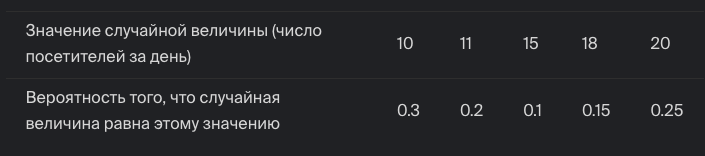

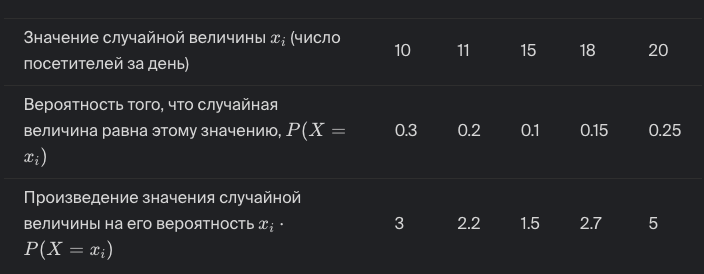

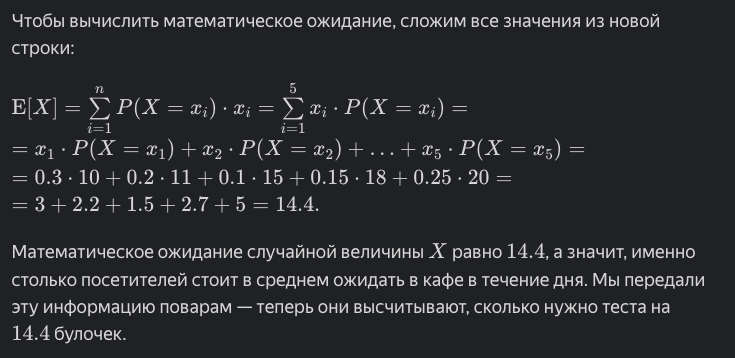

Итого, мат ожидание - это очень важная характеристика — она позволяет понять, какое значение можно в среднем ожидать от случайной величины. Поэтому математическое ожидание неплохо описывает, вокруг какого значения будут распределены остальные

#### Дисперсия дискретной случайной величины

По своей сути - это характеристика разброса случайной величины

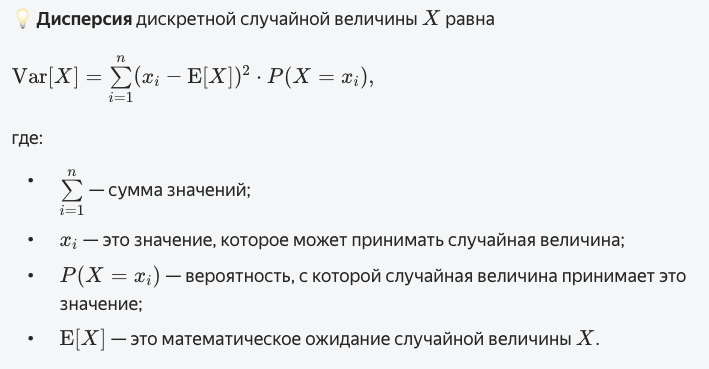

На примере того же кафе посчитаем дисперсию случайной величины

Учитывая, что мат ожидание равно 14.4 (см выше)

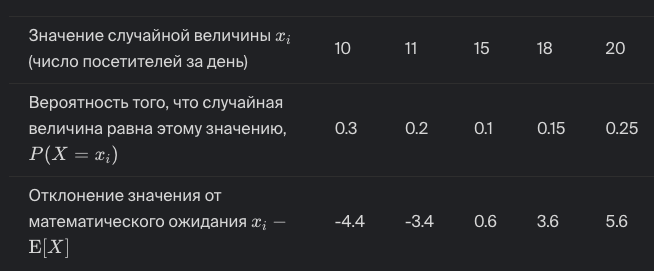

Возводим в квадрат все отлклонения:

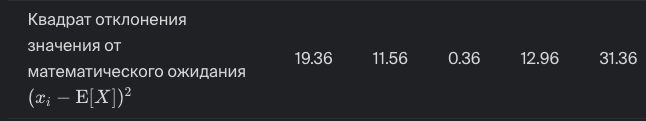

Добавим ещё одну строку, в которой вычислим произведение квадрата отклонения и вероятности этого значения 

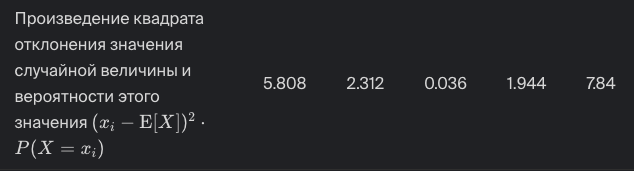

Тогда суммируя все значения, получаем, что дисперсия случайной величины равна 17.94 

Тогда стандартное отклонение равно корню из дисперсии = 4.24 

Тогда все значения из набора лежит в пределах +- 3 стандартных отклонения (97-99 % всех значений)

или иными словами, число посетителей нашего кафе за день наверняка будет лежать в промежутке:

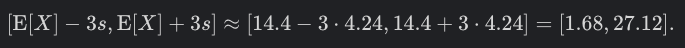

In [1]:
0.4*(195-100)**2 + 0.1*(195-150)**2 + 0.1*(195-200)**2 + 0.2*(195-250)**2+ 0.2*(195-350)**2

9225.0

Вторая формула для дисперсии:

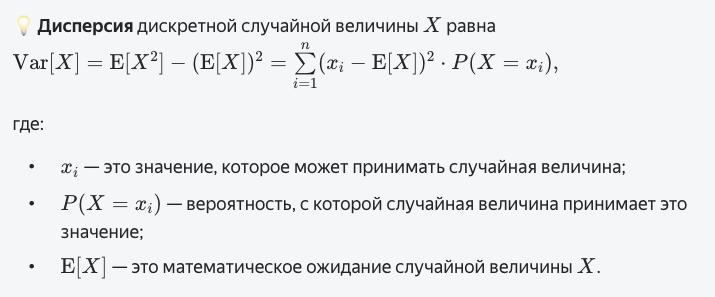

Расчет по второй формуле будет выглядеть так:

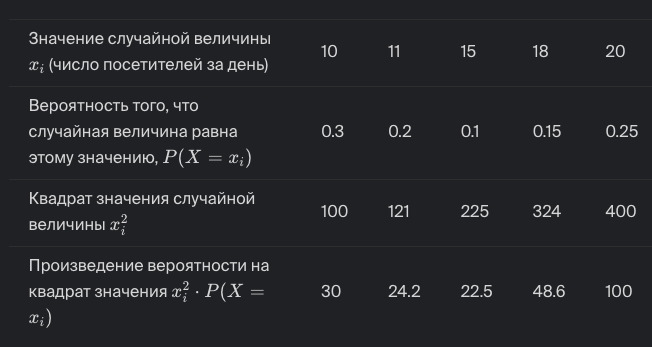

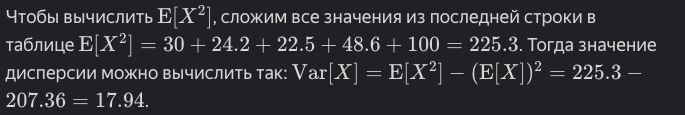

Ответ совпадает с ранее посчитанным

Это возможно по причине того, что эти вероятности равны:

- вероятность того, что квадрат случайной величины X окажется равен одному из значений этой случайной величины в квадрате;

- вероятность того, что случайная величина X примет это значение.


#### Свойства дисперсии случайной величины
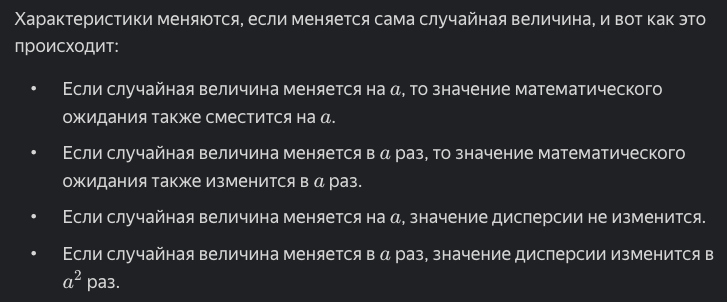


Пример: чему равна дисперсия?

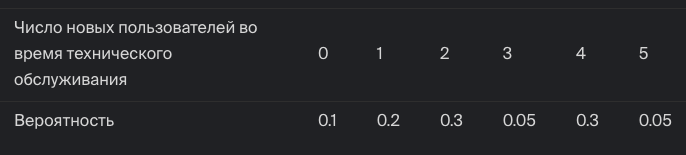

мат ожидание = 2.4 

мат ожидание от квадрата значений  = 0+ 0.2 + 1.2 + 0.45 +4.8 + 1.25 = 7.9

тогда дисперсия равна 7.9 - 2.4**2 = 2.14

### Распределения 

#### Эксперимент Бернулли

    Испытание с двумя исходами называют экспериментом (испытанием) Бернулли

Распределение с двумя исходами часто называют схемой Бернулли

Пример распределения Бернулли 

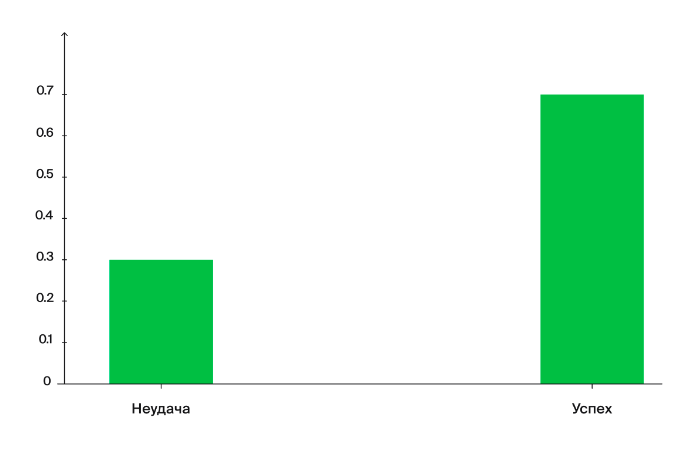

#### Биноминальный эксперимент


https://practicum.yandex.ru/trainer/data-scientist/lesson/c274d442-fec9-40f4-a90b-ec6fe2d1d528/

        Биномиальный эксперимент — это эксперимент, в котором подряд проводят несколько одинаковых и независимых друг от друга испытаний Бернулли. Под независимостью понимают то же, что и в теории вероятностей: исход одного эксперимента не влияет на вероятности исходов другого. 

#### Распределение вероятностей биномиального эксперимента с двумя испытаниями по схеме Бернулли

В задачах с биномиальным экспериментом определяют случайную величину «количество успехов» и строят для неё распределение вероятностей.

Например, в задаче о злых и добрых питонах случайная величина «количество злых питонов из двух выбранных случайно» принимает значения 0,1,2. 

Чтобы построить её распределение вероятностей, нужно:

- зафиксировать значение случайной величины;
- определить количество исходов, которые приводят к такому значению случайной величины;
- рассчитать вероятность одного исхода с нужным количеством успехов;
- домножить значение из п.2 на вероятность из п.3.

Тогда при условии, что вероятность для питона быть добрым = 0.9 , таблица распределения двух злых питонов будет выглядеть так

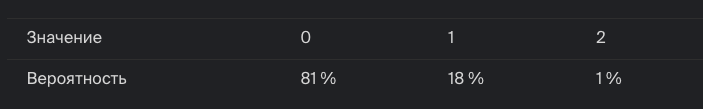

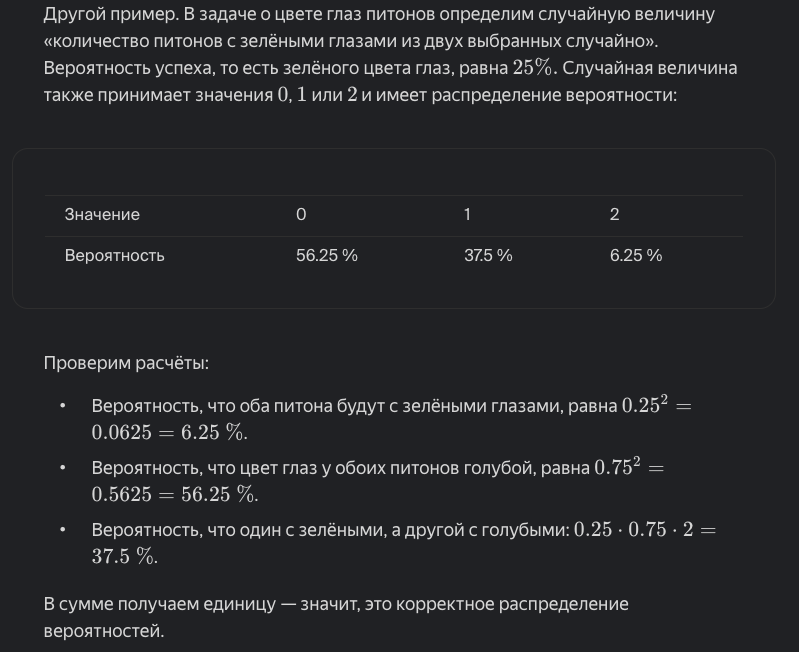

#### Биноминальное распределение 

https://practicum.yandex.ru/trainer/data-scientist/lesson/78e8582b-448b-485e-b6f2-a7f9b683bcbe/

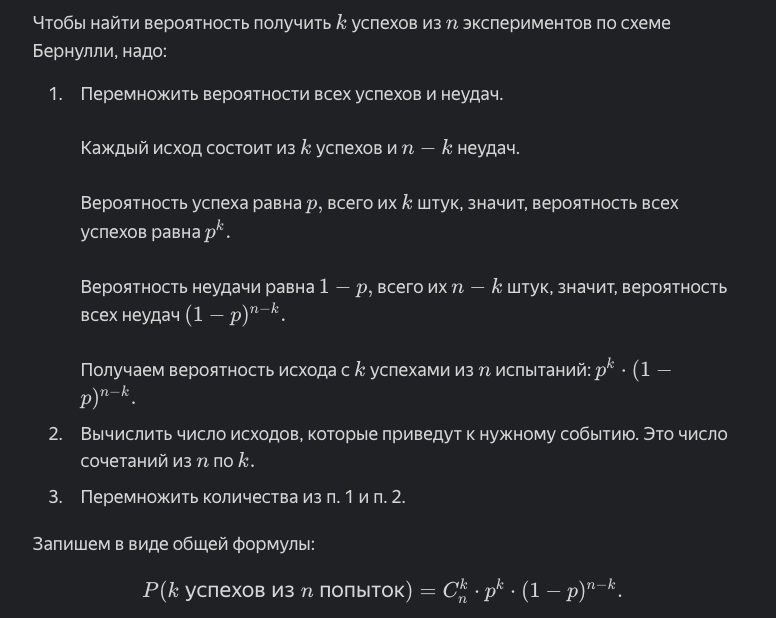

где количество сочетаний считается по формуле

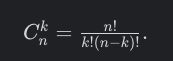

Плюс указаны вероятность успеха и вероястность неудачи

        Пример:

        Магазин отправляет VIP-клиентам письмо со специальным предложением. Каждое отправленное письмо — испытание с двумя исходами:
        клиент открыл письмо — успех;
        клиент не открыл письмо — неудача.

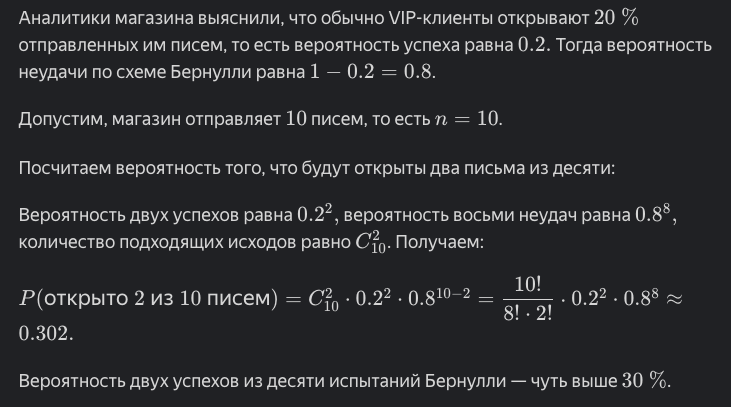

Биномиальное распределение

Часто исследователей интересует вероятность не конкретного числа успехов, а интервала. Например, какова вероятность, что:

- Из десяти писем откроют больше шести?
- В партии из ста лампочек будет меньше двух бракованных?
- Из семи питонов добрыми окажутся от двух до пяти?

Чтобы ответить на эти вопросы, нужно построить распределение, то есть найти вероятности для любого возможного количества успехов.

Случайная величина распределена биномиально, если:

- Проводится фиксированное число попыток n.

- Каждая попытка — простой эксперимент Бернулли ровно с двумя исходами.

- Вероятность успеха p одинакова для всех n попыток.

- Попытки независимы между собой.

В общем виде распределение случайной величины успехов выглядит таким образом:

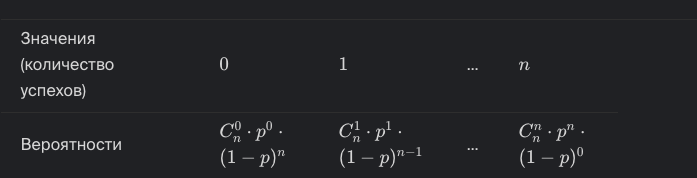

Зная вероятности всех значений, можно рассчитать математическое ожидание и дисперсию для распределения. 

Для биномиального распределения формулы получаются короткими: мат.ожидание равно **n⋅p**, а дисперсия **n⋅p⋅(1−p)**. 

По мат.ожиданию легко судить каким будет самое вероятное значение — это самое близкое к **n⋅p** число. Это видно и на графиках.

Теперь посмотрим на само распределение. Допустим, вероятность успеха и неудачи одинакова и равна 0.5 

<BarContainer object of 26 artists>

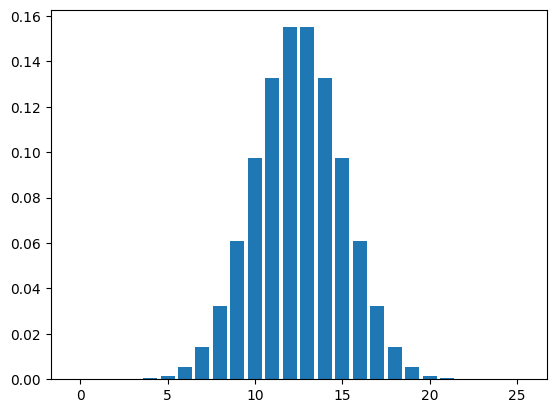

In [7]:
from matplotlib import pyplot as plt
from math import factorial

n = 25 # количество попыток
p = 0.5 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

Распределение получается симметричным. 

Но что, если вероятность успеха больше/меньше вероятности успеха?

<BarContainer object of 31 artists>

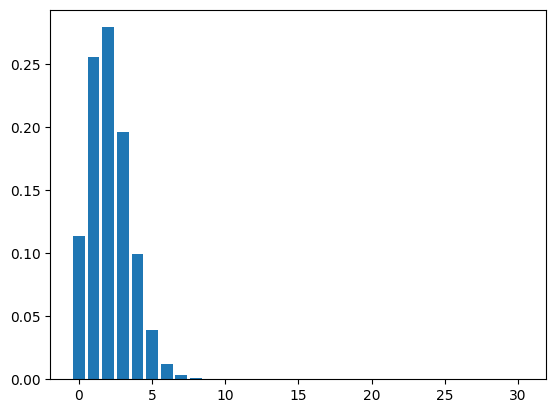

In [8]:
# пусть вероятность успеха сильно меньше неудачи - тогда график будет скошен влево

from matplotlib import pyplot as plt
from math import factorial

n = 30 # количество попыток
p = 0.07 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

График показывает, что при вероятности успеха p, равной 7 %, и 30 попытках вероятность, что случится больше 8 успехов, крайне мала. 

<BarContainer object of 31 artists>

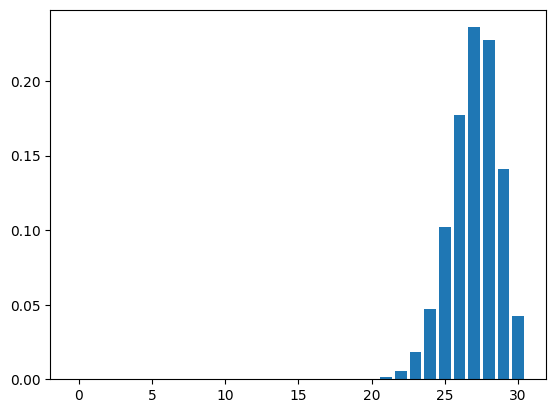

In [10]:
# и наоборот: пусть вероятность успеха сильно больше неудачи - тогда график будет скошен вправо

from matplotlib import pyplot as plt
from math import factorial

n = 30 # количество попыток
p = 0.9 # вероятность успеха

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

Кстати, сократить код можно с помощью binom.pmf (probability mass function — функция для дискретных распределений, которая показывает вероятность каждого значения.)

<BarContainer object of 27 artists>

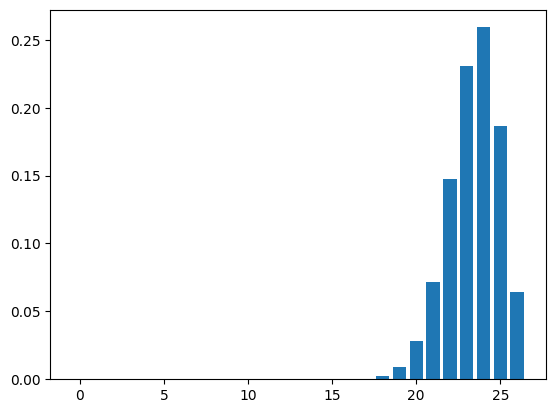

In [11]:
from matplotlib import pyplot as plt
from scipy.stats import binom

n = 26 # количество попыток
p = 0.9 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)

Пример - как читать такие графики

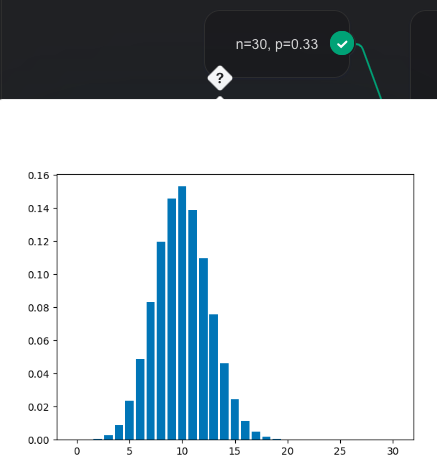

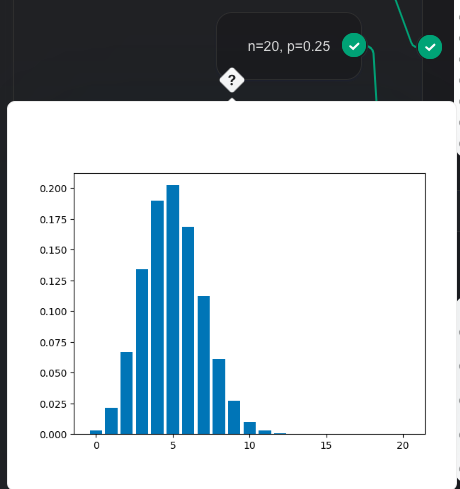

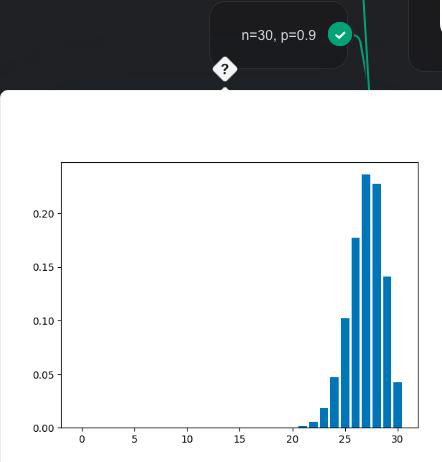

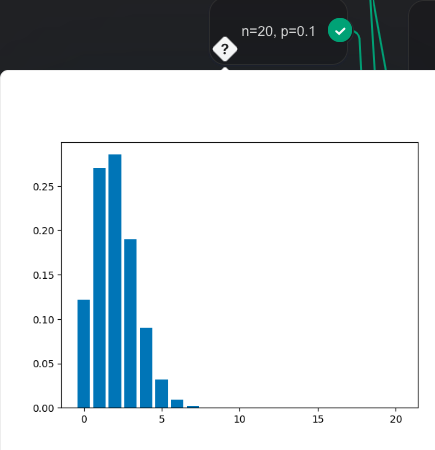

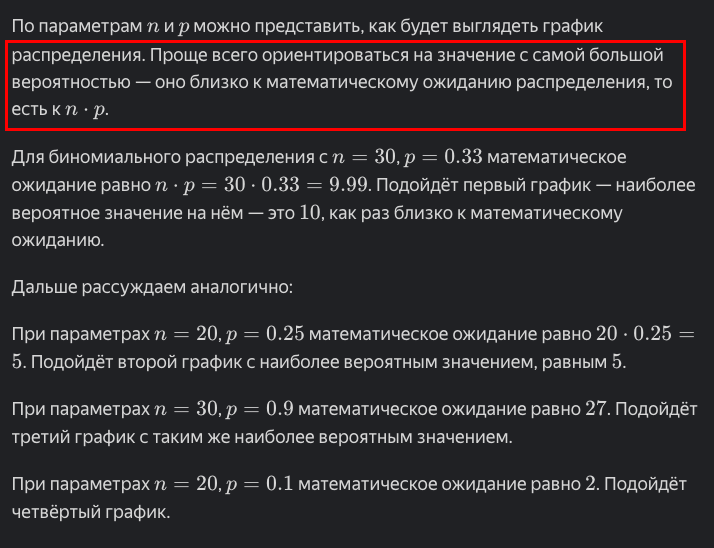

    Пример: 

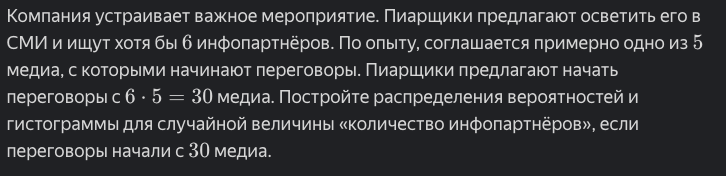

<BarContainer object of 31 artists>

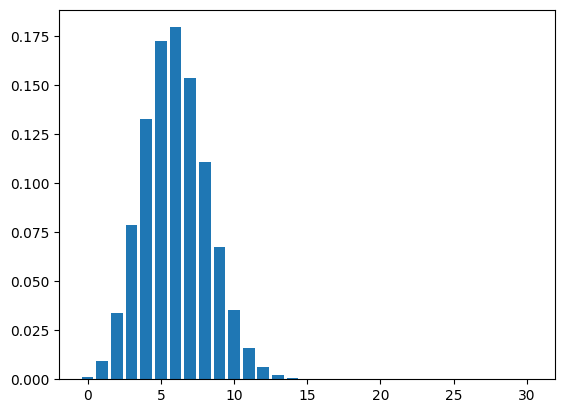

In [12]:
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import binom

p = 0.2
n = 30

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.bar(range(0, n + 1), distr)

Если начать переговоры с 
30 медиа, то 6 — наиболее вероятный результат. Однако слишком велика вероятность, что успехов будет меньше. 

На гистограмме видно, что в диапазоне от 
0 до 
5 успехов примерно половина всего распределения. Риск неприемлемо велик.

<BarContainer object of 46 artists>

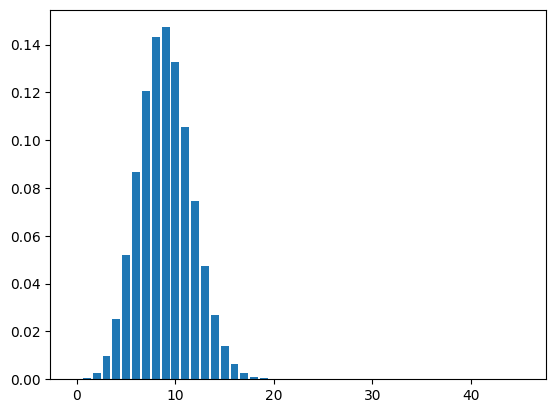

In [13]:
# увеличим число партнеров до 45

from matplotlib import pyplot as plt
from math import factorial

p = 1/5
n = 45

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n-k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

Когда потенциальных партнёров 
45, то ситуация улучшается. Если сложить вероятности от 
0 до 
5 успехов, то в интервале от 
0 до 
5 всё ещё почти 
10 % — в каждом десятом случае вам грозит недобор партнёров.

Увеличим количество потенциальных инфопартнёров до 
60:

<BarContainer object of 61 artists>

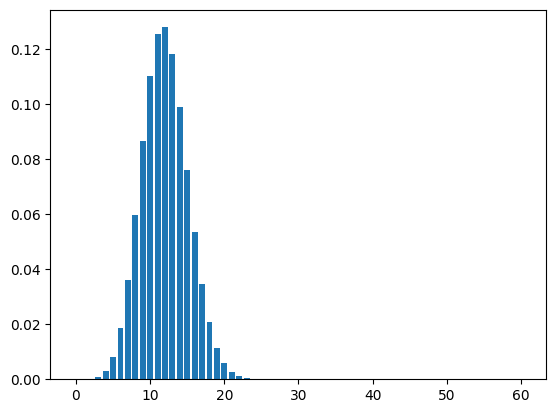

In [14]:
from matplotlib import pyplot as plt
from math import factorial

p = 1/5
n = 60

distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1-p)**(n-k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)

Если начать переговоры с 
60 медиа, риск получить меньше 
6 партнёров совсем мал, около 
1 %. 

Как видно, если нужно шесть инфопартнёров и соглашается каждое пятое СМИ, недостаточно переговоров с 
6⋅5=30 медиа. 

Вам (и пиарщикам тоже!) нужно понимать, как распределена вероятность для разного количества успехов. Тогда получится верно оценить необходимый охват и начать переговоры с минимальным количеством медиа — таким, чтобы вероятность не найти нужное число инфопартнёров не была слишком высокой

    Пример 2

Питон Петя решил после питонопитомника поступить в питоноакадемию.
Для этого ему надо сдать шесть разных (не зависящих друг от друга) экзаменов.
Петя думает, что он отлично подготовился: вероятность завалить каждый из этих экзаменов, судя по пробным вариантам, для него равна 
15 %.

Постройте распределение вероятностей для случайной величины «количество заваленных Петей экзаменов» и гистограмму для неё.

<BarContainer object of 7 artists>

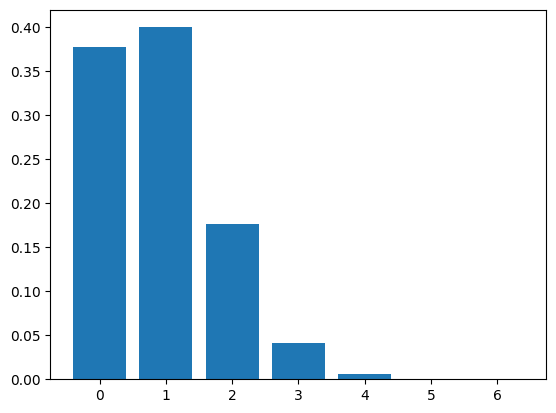

In [15]:
from matplotlib import pyplot as plt
from math import factorial

n_exams = 6
failure_rate = 0.15
p= failure_rate

distr = []

for k in range(0, n_exams + 1):
     choose = factorial(n_exams) / (factorial(k) * factorial(n_exams-k))
     prob = choose * p**k * (1 - p)**(n_exams - k) 
     distr.append(prob)
        
# построение гистограммы распределения вероятностей
plt.bar(range(0, n_exams + 1), distr)

Казалось бы, вероятность прохождения экзамена в 
85 % должна вселять уверенность. Но оказывается, что при 
n=6 и 
p=0.15 вероятность завалить один экзамен выше, чем вероятность не завалить ни одного. А если сравнить вероятность не завалить ни одного с вероятностью завалить хотя бы один (то есть один или больше), получаем, что с вероятностью более 
60 % хотя бы один экзамен будет не пройден (видно, что вероятность нуля меньше, чем 
40 %). 

Выходит, 
85 % успехов недостаточно и надо готовиться лучше.

#### Непрерывное равномерное и нормальное распределения

https://practicum.yandex.ru/trainer/data-scientist/lesson/893f569a-457d-46f6-86cf-098cc99ea355/

Для непрерывных случайных величин сложно составить  таблицу распределения случайных величин, ведь эти случайные величины принимают любые значения на определённом промежутке или даже на всей числовой прямой. 

Для таких величин задают функцию плотности вероятности, по которой можно рассчитать вероятность того, что случайная величина попадёт в нужный промежуток. Плотность вероятности в этом смысле аналогична плотности частоты при построении гистограммы: площадь под графиком над выбранным интервалом равна вероятности того, что случайная величина попадёт в этот интервал.

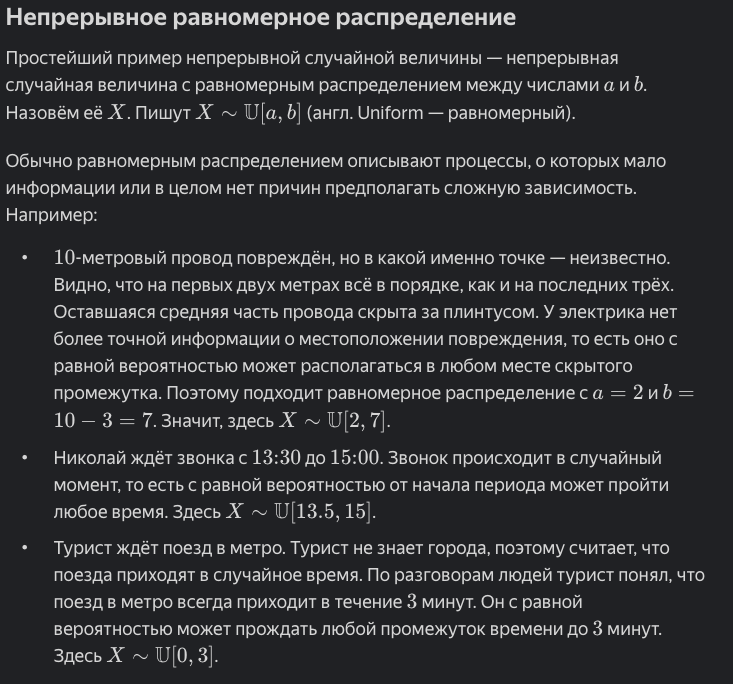

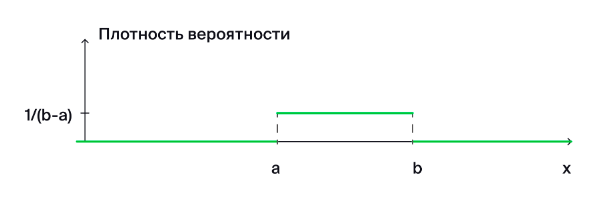

    Пример: 


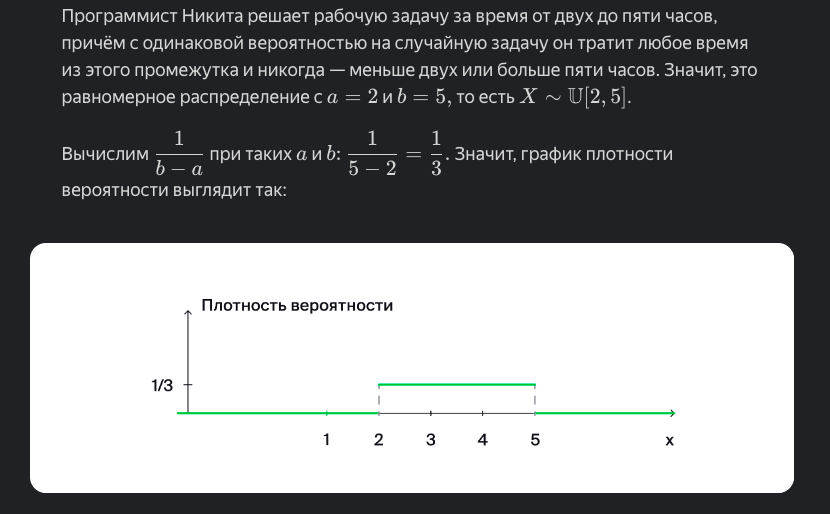

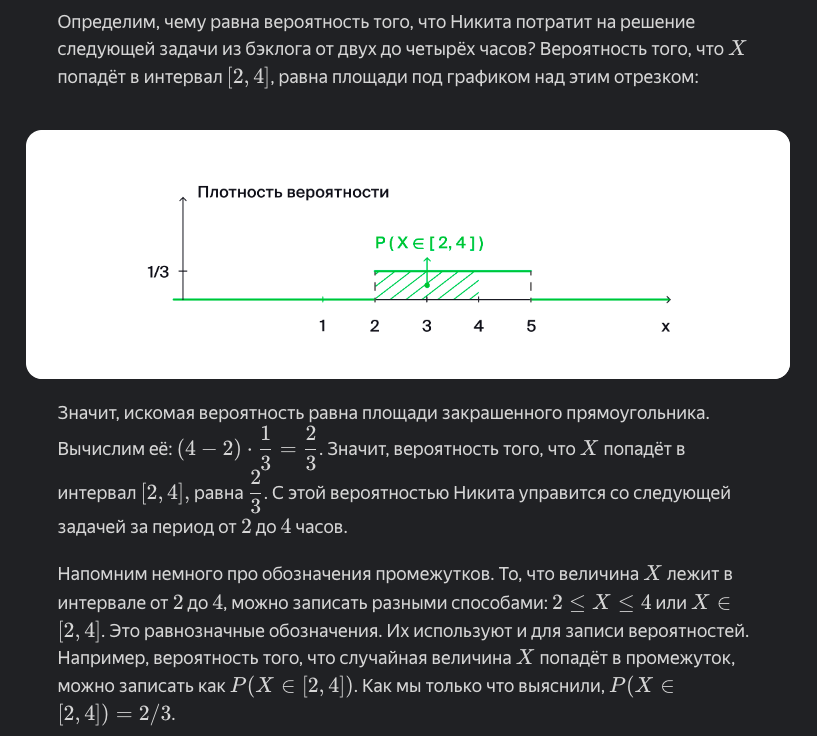

Основная идея расчётов останется той же: площадь под её графиком равна вероятности.

#### Нормальное распределение

Многие случайные величины распределены так: 
- Средние значения и значения около них встречаются с высокой вероятностью.
- Чем дальше от среднего, тем меньше вероятность встретить такое значение.
- Вероятность очень маленьких или очень больших значений мала, но есть.

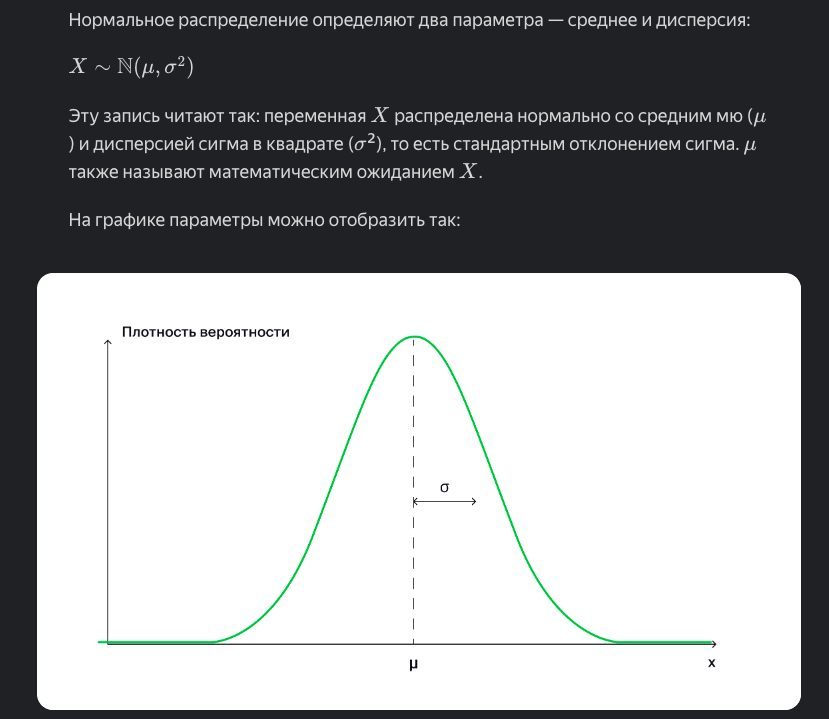
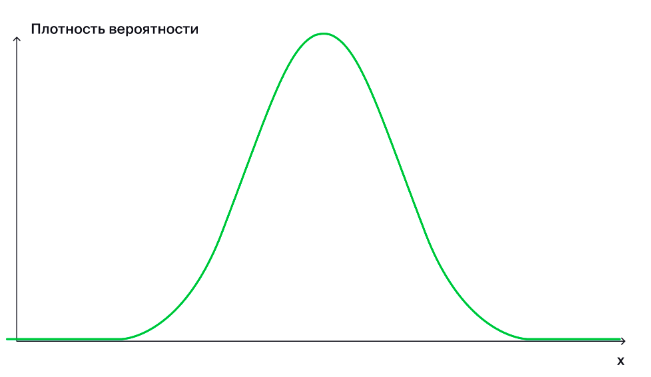

Пример

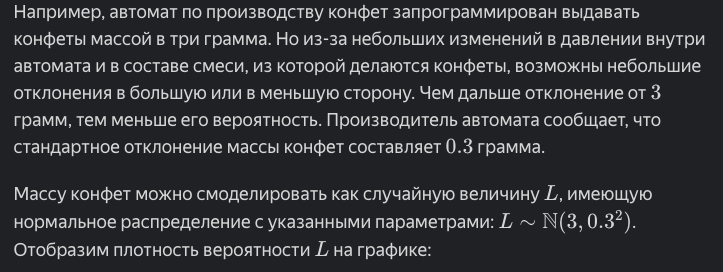

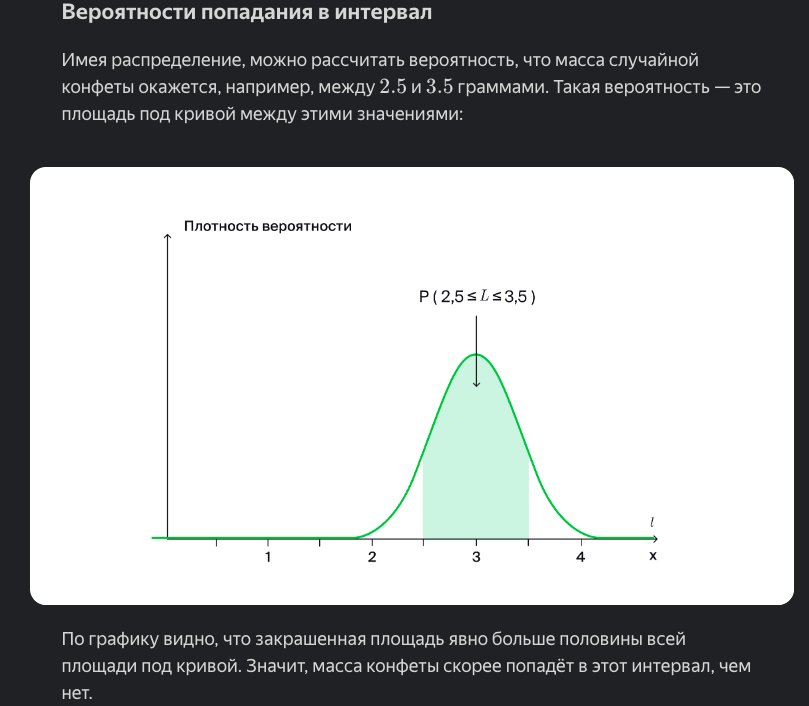

Общая таблица свойств всех распределений


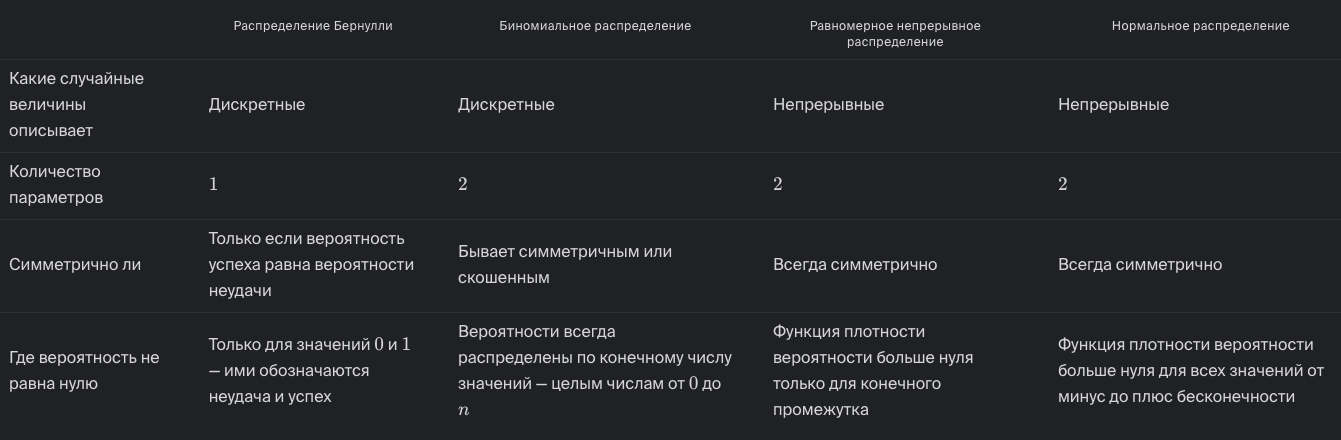

Сравнение плотности вероятности и кумулятивного значения вероятности при изменении интервала от минус бесконечности до заданного значения

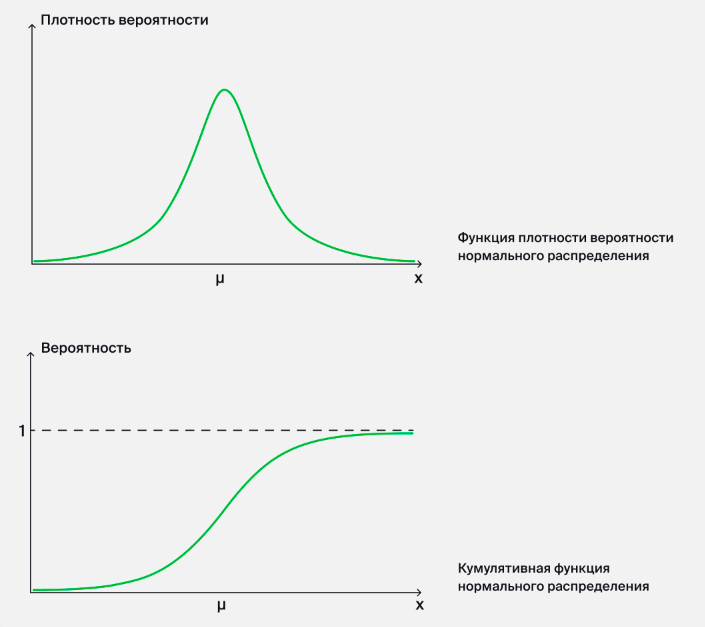

In [16]:
from scipy import stats as st

# математическое ожидание
mu = 1000
# стандартное отклонение
sigma = 100

# задаём нормальное распределение с математическим ожиданием 1000 
# и стандартным отклонением 100
distr = st.norm(1000, 100) 

# значение, для которого хотим найти вероятность
x = 1000

# считаем вероятность получить значение, равное x или меньше 
result = distr.cdf(x)

print(result)

0.5


Поиск значения кумулятивной функции вероятности нормального распределения в Python

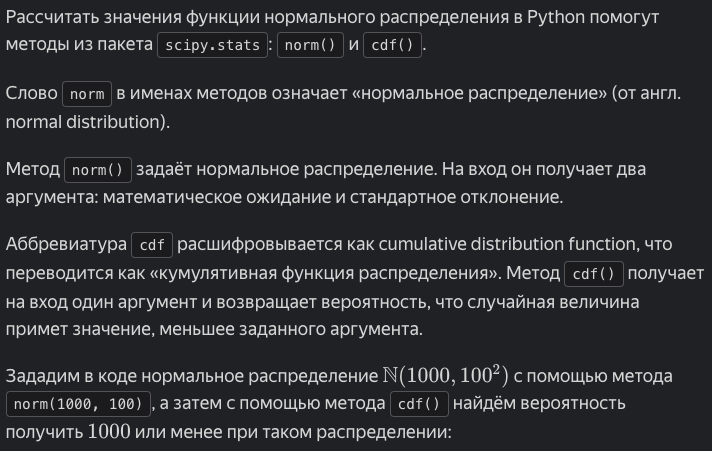


Пример: имеем беспилотный автомобиль. Его среднее время реакции на препятствие - 1 секунда. Стандартное отклонение 0.1 секунда. 

Вопрос - с какой вероятностью автомобиль отреагирует на препятствие в пределах 0.05 секунды 

Стратегия: 
- считаем вероятность, что значение скорости реакции попадет в интервал между бесконечностью и 0.05 секундами 
- считаем вероятность того, что значение скорости реакции попадет в интервал между бесконечностью и (1+ 0.05) секундами 
- считаем разницу 

Почему?

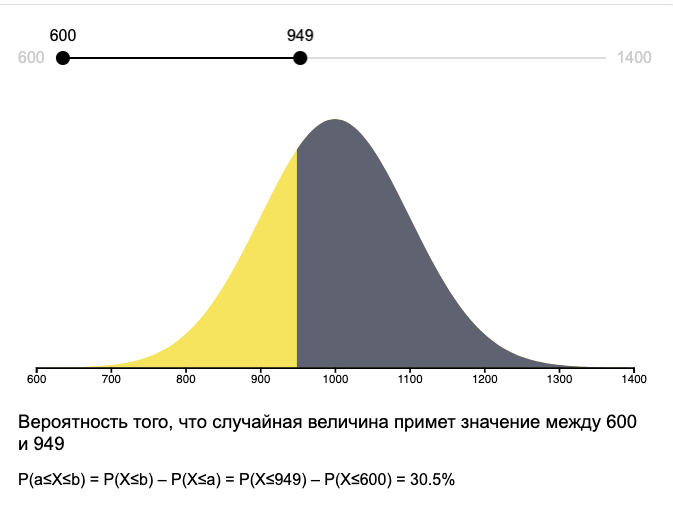

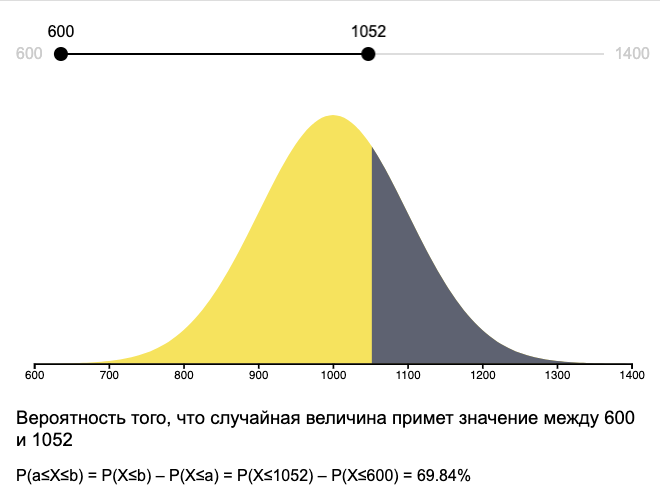

Итог - искомый интервал выглядит вот так: 

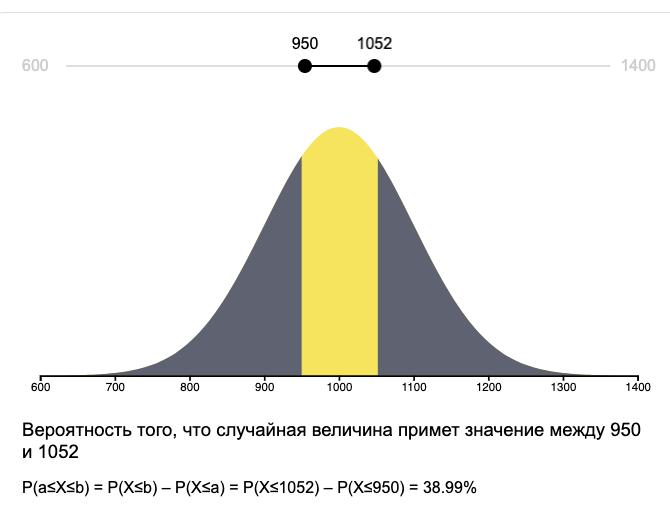

In [17]:
from scipy import stats as st

mu = 1
sigma = 0.1

distr = st.norm(mu, sigma) 

x1 = 0.95
x2 = 1.05

result = distr.cdf(x2) - distr.cdf(x1)

print(result)

0.3829249225480265


значение вероятности совпадает

Пример про мяч и студентов

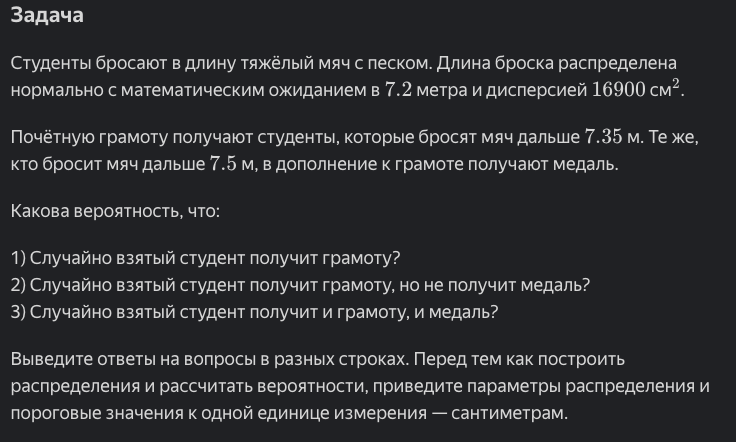

In [18]:
from scipy import stats as st

distr = st.norm(720, 130)

gram = 735
medal = 750
# задайте значения случайной величины - пороги длин броска для получения грамот и медалей

print('Вероятность получить грамоту:', 1-distr.cdf(735))
print('Вероятность получить грамоту без медали:',  distr.cdf(750)-distr.cdf(735))
print('Вероятность получить медаль:', 1- distr.cdf(750) )

Вероятность получить грамоту: 0.4540701363287163
Вероятность получить грамоту без медали: 0.04532309314702598
Вероятность получить медаль: 0.4087470431816903


#### Стандартизация нормального распределения (Z-распределение)

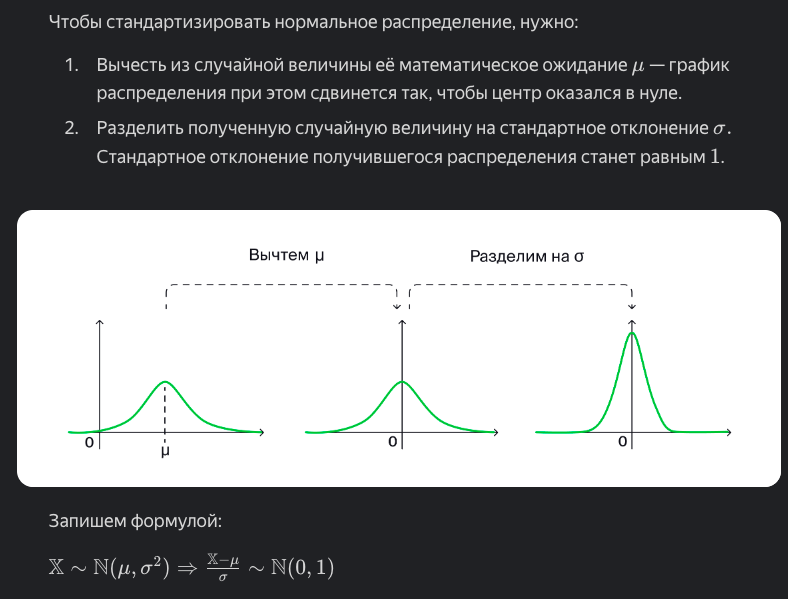

        Z-значение — это количество стандартных отклонений, на которое некоторое число отклонилось от центра нормального распределения.

Пример по прыжкам в длину у мальчиков и девочек

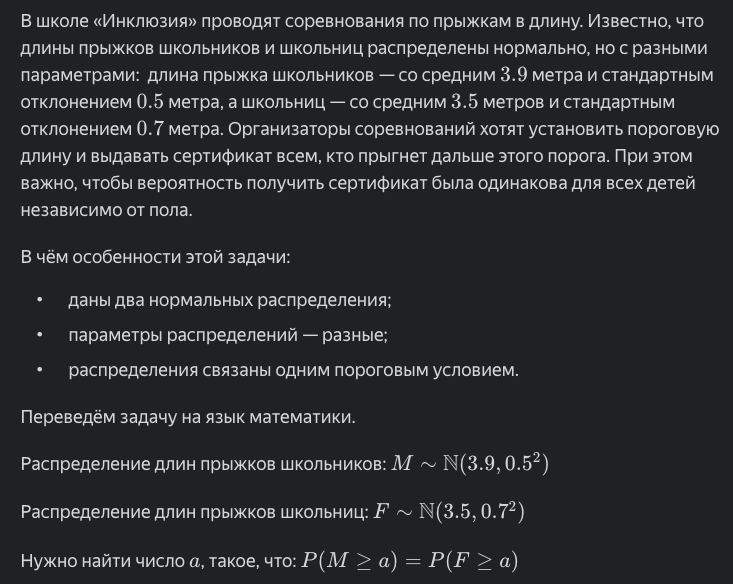

Иными словами, нам нужно найти такую длину прыжка, при которой и мальчики и девочки могут равновероятно совершить такой прыжок

Это возможно за счет того, что стандартное отклонение по длине прыжка у девочек выше, чем у мальчиков, хоть и их среднее значение меньше

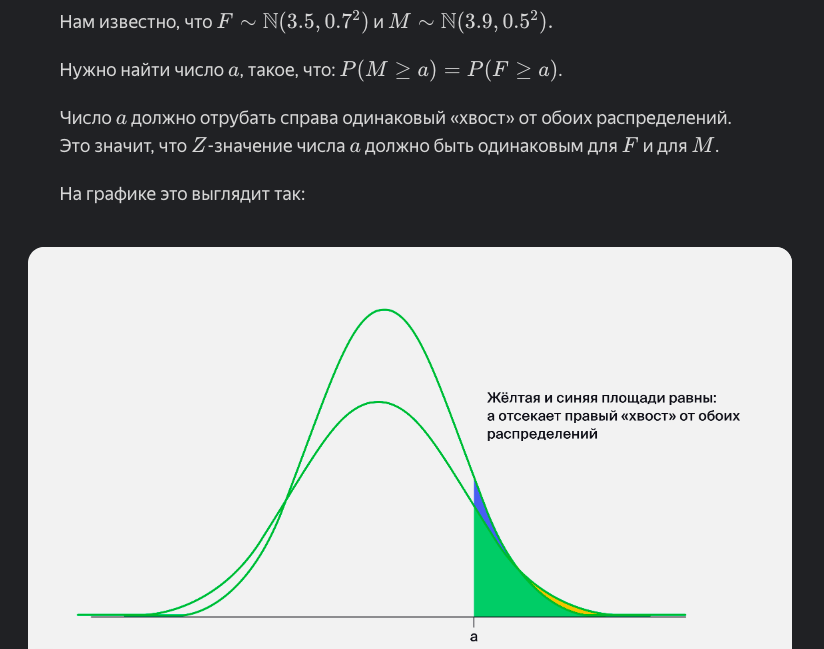

Поиск такого значения возможен именно через приведение к Z-распределению

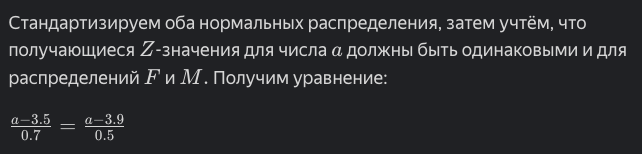

длина прыжка а = 4.9 метра


In [19]:
# а процент мальчиков и девочек будет соответственно

from scipy import stats as st

# зададим нормальное распределение для школьниц:
mu_F = 3.5
sigma_F = 0.7
distr_F = st.norm(mu_F, sigma_F) 

# зададим нормальное распределение для школьников:
mu_M = 3.9
sigma_M = 0.5
distr_M = st.norm(mu_M, sigma_M) 

# найденная пороговая длина прыжка a, за прыжок дальше которой выдаётся сертификат:
a = 4.9

# найдём и выведем на экран вероятности правых хвостов для a,
# округлив их до 5 цифр после запятой:
print('Вероятность того, что случайная школьница получит сертификат:',
				round(1- distr_F.cdf(a),5))
print('Вероятность того, что случайный школьник получит сертификат:',
				round(1- distr_M.cdf(a), 5))

Вероятность того, что случайная школьница получит сертификат: 0.02275
Вероятность того, что случайный школьник получит сертификат: 0.02275


Пример про выбор часового пояса

У компании International два офиса: один — в Ванкувере, другой — в Лондоне. В обоих офисах одинаковое количество сотрудников, а рабочий день с 9 до
18. 

Когда в Ванкувере 
9 утра, в Лондоне — 
17 вечера.

HR-менеджеры компании предлагают провести онлайн-игру между сотрудниками из разных стран. Для этого нужно, чтобы число участников от обоих офисов совпадало. Единственная возможность организовать это — найти время, когда в Ванкувере пришло на работу столько человек, сколько ещё не ушло в Лондоне. 

Менеджеры выяснили, что время прихода на работу в Ванкувере распределено нормально со средним в 
9:00 и стандартным отклонением в 
10 минут, а в Лондоне время ухода с работы распределено со средним в 
18:00 и стандартным отклонением в 
15 минут.

Какое время по часовому поясу Ванкувера стоит выбрать для начала онлайн-игры? 

значение в минутах вычисляем так:
- назначаем время прихода на работу  в ванкувере как базовое - 9 утра = 0 часов и минут
- соответственно время в лондоне, когда сотрудники пойдут с работы - 18 вечера ( то есть +1 час от прихода на работу в Ванкувере) = 60 минут

- обе величины распределены нормально, а значит найти нужно такую вероятность наличия сотрудника и в Ванкувере, и в Лондоне (плотность вероятности под графиком), которая будет одинакова для обоих городов

- то есть для ванкувера это будет вероятность правого хвоста (отсечка в минутах, свыше которой случайный сотрудник уже точно на работе)
- а для лондона - левый хвост (отсечка в минутах, когда случайный сотрудник еще точно не ушел из офиса)

На формуле это выглядит так:

(а-0)/10 = (60- а)/15

Откуда получаем, что а= 24 минуты

In [23]:
# а процент мальчиков и девочек будет соответственно

from scipy import stats as st

# зададим нормальное распределение для ванкувера:
mu_Vank = 0        # скажем, что это 9:00 - это стартовая величина
sigma_Vank = 10    # 10 минут пороговое значение стандартного отклонения
distr_V = st.norm(mu_Vank, sigma_Vank) 

# зададим нормальное распределение для лондона (когда в ванкувере 9:00 в лондоне - 17:00)
# а раз рабочий день до 18:00 то уход с работы в среднем происходит в +1 час от нулевого значения по Ванкуверу:
mu_London = 60      # + 1 час - это 60 мин: то есть в среднем в течение 60 минут 
                    #  от начала рабочего времени в Ванкувере люди в лондоне уходят с работы
sigma_London = 15   # 15 минут стандартного отклонения
distr_L = st.norm(mu_London, sigma_London) 

# пороговое значение в минутах (см описание выше)
a = 24

# найдём и выведем на экран вероятности правых хвостов для a,
# округлив их до 5 цифр после запятой:
print('Вероятность того, что случайный человек в Ванкувере уже пришел на работу в пределах 24 минут:',
				round(distr_V.cdf(a),5))
print('Вероятность того, что случайный человек в Лондоне еще не ушел с работы:',
				round(1- distr_L.cdf(a), 5))

Вероятность того, что случайный человек в Ванкувере уже пришел на работу в пределах 24 минут: 0.9918
Вероятность того, что случайный человек в Лондоне еще не ушел с работы: 0.9918


#### Percent Point Function для нормального распределения

Аббревиатура 
PPF расшифровывается как **percent point function** и переводится с англ. как «функция процентных значений». Если даны распределение и вероятность, то эта функция вернёт значение, которое отсекает левый «хвост», соответствующий этой вероятности. 

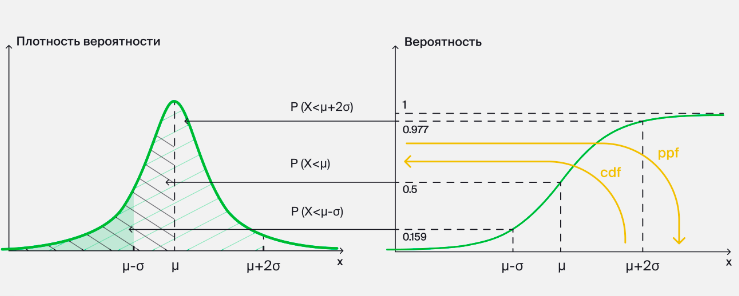

In [24]:
from scipy import stats as st

distr = st.norm(1234, 56) 

x_0 = 1234 + 56

result = distr.cdf(x_0)
print(result)

0.8413447460685429


обратная операция - поиск значения, которое отсекает на графике нужную вероятность

In [25]:
from scipy import stats as st

distr = st.norm(1234, 56) 

p = 0.8413447460685429

result = distr.ppf(p)
print(result)

1290.0


Пример: Известно, что время работы лампочки накаливания до перегорания распределено нормально со средним в 
1200 часов и стандартным отклонением в
80 часов. Сколько часов случайная лампочка будет гореть, не перегорая, с вероятностью 
80 %?

In [26]:
from scipy import stats as st

distr = st.norm(1200, 80) 

p = 0.2

result = distr.ppf(p)
print(result)

1132.6703013141669


Задача про стоимость доставки (должна быть не выше, чем половина стоимости для 75% заказов)

In [36]:
import scipy.stats as stats

mu = 2400
sigma = 320
threshold = 0.75

max_delivery_price = st.norm(2400, 320).ppf(1-threshold) /2

print('Максимальная стоимость доставки курьером:', max_delivery_price)


Максимальная стоимость доставки курьером: 1092.0816399686269


Логика:
- 75 % всех заказов лежит в промежутке от 0 до Х цены
- Х цену определяем обратным отсечением от нормального распределения левого хвоста - получится 2184 рубля
- делим ее пополам - получаем максимальную цену доставки

#### Распределение Пуассона

https://practicum.yandex.ru/trainer/data-scientist/lesson/106ca585-25a4-41c7-841a-f96b3c40b717/

В каких случаях работает распределение Пуассона:

Происходит некоторый процесс, обычная интенсивность которого известна.
События — реализации этого процесса — происходят независимо друг от друга (как и успехи в экспериментах по схеме Бернулли в биномиальном распределении).

Распределение Пуассона задаётся единственным параметром — интенсивностью процесса. Она показывает, сколько обычно событий происходит за некоторый промежуток времени. 

Интенсивность обозначают 
λ (лямбда). 

Она задаётся для фиксированного временного промежутка. Её можно рассчитать для той же случайной величины и для других промежутков времени.

Пример с расчетом вероятности появления северного сияния через распределение Пуассона

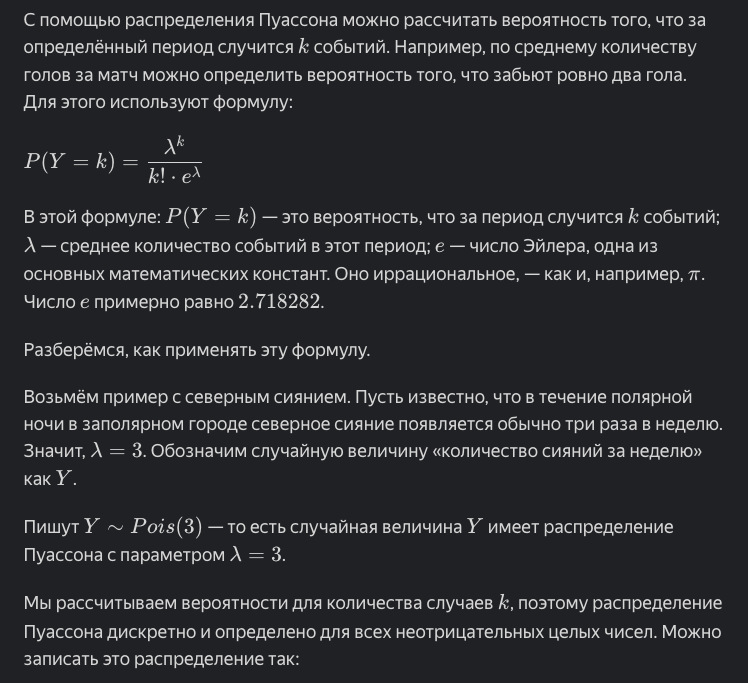

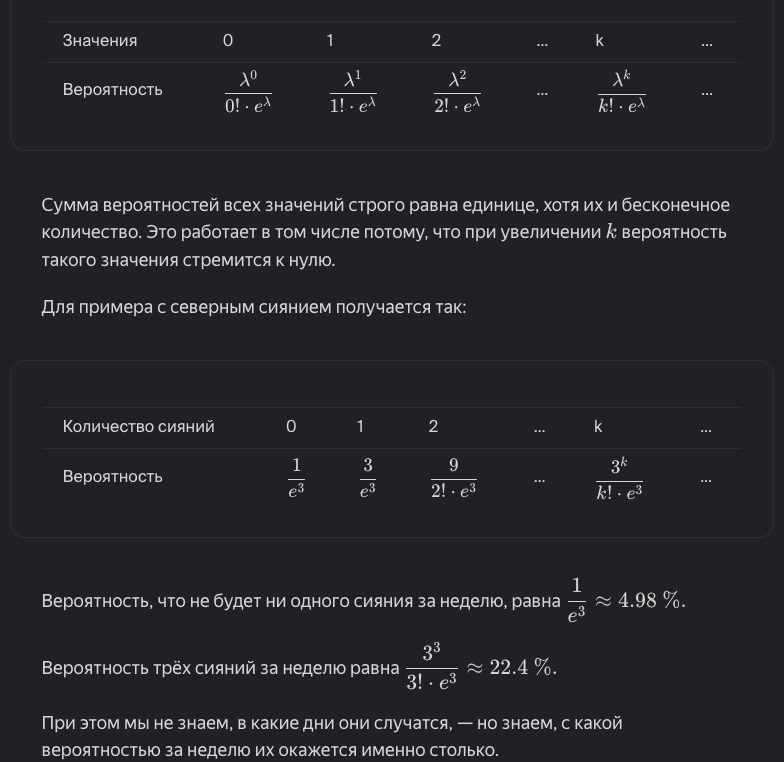

Пример: На сервисе стриминга музыки в среднем регистрируется 
2 музыкальные группы в день. Какова вероятность, что завтра на этом сервисе зарегистрируется 
3 группы?

Среднее значение (интенсивность) лямба = 2 группы в день

по распределению пуассона (см выше):
- для 0 групп в день вероятность равна 1/e**2
- для 1 группы вероятность равна 2/e**2
- для 2 групп вероятность равна 2**2 / 2! / e **2
- для 3 групп - 2^3/ 3!/ e^2


In [39]:
import math
4/3/math.e**2


0.18044704431548358

Вывод - вероятность регистрации в какой-то день - 3 групп составляет 18% 

#### График распределения Пуассона


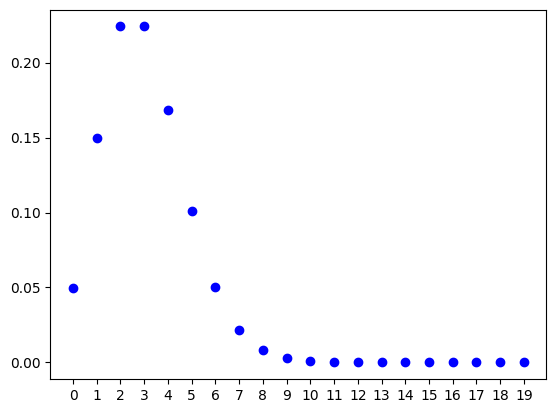

In [40]:
import matplotlib.pyplot as plt
from math import factorial, exp
 
# параметр лямбда (используем lmbd, так как lambda зарезервировано в Python):
lmbd = 3
 
distr = []
# для всех чисел от 0 до 19
for k in range(20):
    # рассчитаем вероятности по формуле распределения Пуассона:
    p = (lmbd ** k) / (factorial(k) * exp(lmbd))
    distr.append(p)
 
# зададим график из полученных значений с о-образными точками синего цвета
plt.plot(range(20), distr, 'bo')
# используем числа от 0 до 19 как подписи для горизонтальной оси:
plt.xticks(range(20))
# отобразим график:
plt.show()

Чтобы получить вероятности распределения Пуассона, вместо расчёта непосредственно по формуле можно использовать метод poisson.pmf() из модуля scipy.stats. 

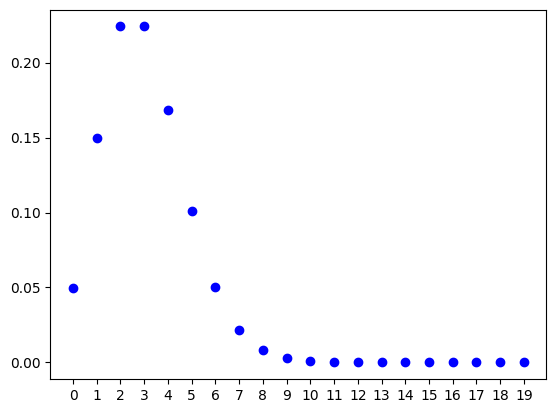

In [41]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
 
# параметр лямбда:
lmbd = 3
 
distr = []
# для всех чисел от 0 до 19
for k in range(20):
    # рассчитаем вероятности этого значения с помощью метода pmf():
    p = poisson.pmf(k, lmbd)
    distr.append(p)
 
# зададим график из полученных значений с о-образными точками синего цвета
plt.plot(range(20), distr, 'bo')
# используем числа от 0 до 19 как подписи для горизонтальной оси:
plt.xticks(range(20))
# отобразим график:
plt.show()

        Еще раз: биномиальное распределение переходит в Пуассона, если испытания Бернулли происходят с небольшой вероятностью успеха много раз подряд в равные промежутки времени.

#### Функция распределения Пуассона

В модуле scipy.stats есть ещё один метод: poisson.cdf(). Он выдаёт значения функции распределения для распределения Пуассона, то есть суммарную вероятность значений от 
0 до заданного. 

Построим с его помощью график функции вероятности для того же распределения с параметром 
λ=3. Отобразим значения функции вероятности для первых 
20 целых значений, на которых определено распределение Пуассона.

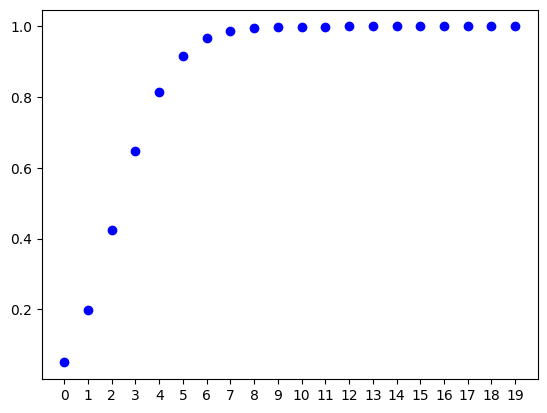

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# параметр лямбда:
lmbd = 3

distr = []
# для значений от 0 до 19
for x in range(20):
    # найдём кумулятивные вероятности
    d = poisson.cdf(x, lmbd)
    distr.append(d)

# зададим график из полученных значений с о-образными точками синего цвета
plt.plot(range(20), distr, 'bo')
# используем значения от 0 до 19 как подписи для горизонтальной оси:
plt.xticks(range(20))
# отобразим график:
plt.show()

Кумулятивная вероятность помогает находить «хвосты» распределения. Для распределения Пуассона это ответы на вопросы типа «какова вероятность, что за промежуток времени произойдёт меньше (или больше) заданного числа событий?»

Пример: 

Сотрудники пляжа в среднем находят в неделю 
4 потерянных солнцезащитных очков, владельца которых так и не удаётся найти. Местная экологическая компания готова взять на переработку партию от 
50 солнечных очков. Какова вероятность, что за календарное лето сотрудники пляжа найдут достаточно очков, чтобы сдать их в переработку? 

В задаче дана интенсивность в неделю, а нужно рассчитать вероятность за календарное лето — это другой временной отрезок. Чтобы решить эту задачу, используем свойство распределения Пуассона, которое позволяет масштабировать интенсивность. 

План решения такой: 
- Рассчитаем количество недель в календарном лете.
- Умножим количество недель на интенсивность событий в неделю. Так мы получим параметр, который задаёт нужное распределение.

- Найдём вероятность с помощью метода cdf:
- В задаче нужно найти вероятность правого «хвоста». Метод cdf помогает получить вероятность левого. Поэтому найдём вероятность левого и вычтем её из единицы — так получим нужную вероятность правого «хвоста».

- В метод cdf передадим минимальное количество найденных очков, уменьшенное на единицу: чтобы получить суммарную вероятность значений от 
50 и выше, из единицы нужно вычесть суммарную вероятность значений до 
49 включительно.

In [43]:
from scipy.stats import poisson

# минимальное необходимое количество:
min_num = 50
# количество дней в июне, июле и августе:
days = 30 + 31 + 31 
# рассчитаем параметр лямбда для этого количества дней:
weeks = days / 7 
lmbd = 4 * weeks
# параметр лямбда может получиться нецелым, это допустимо

print(f'Вероятность правого "хвоста" распределения Пуассона от {min_num}',
      f'при lambda={round(lmbd,1)} равна {1 - poisson.cdf(min_num - 1, lmbd)}'
)

Вероятность правого "хвоста" распределения Пуассона от 50 при lambda=52.6 равна 0.657101690371793


Выводы по распределению Пуассона

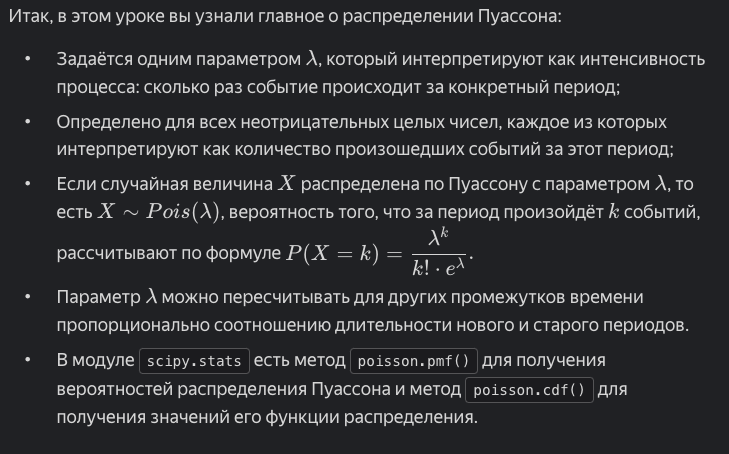

Таблица сравнения распределений

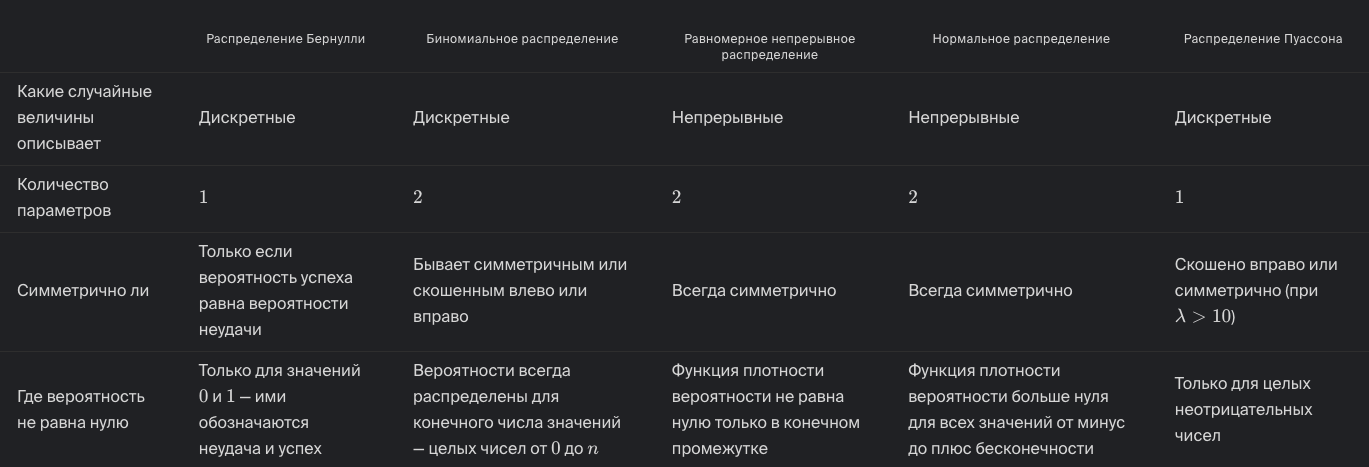

#### Аппроксимация биномиального распределения распределением Пуассона

распределение Пуассона - предельный случай биномиального распределения с большим 
n и малым 
p. 

Но оказывается, можно переходить к распределению Пуассона и не на бесконечности, а раньше — когда количество испытаний относительно велико, а вероятность успеха мала. У распределения Пуассона только один параметр — интенсивность, и это распределение легко масштабировать на разные промежутки времени. Поэтому есть задачи, в которых такая аппроксимация полезна.

    Проведем нескколько итераций по приближению биноминального распределения

для этого примем, что лямбда для распределения Пуассона = n * p (число повторений и вероятность успеха) для биноминального распределения

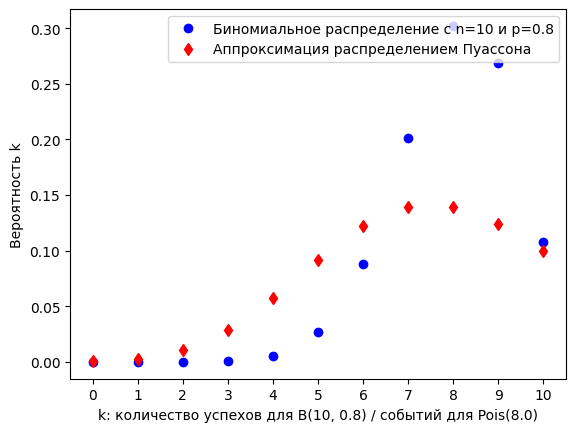

Средняя разница вероятностей на значение: 0.051737727210386296
Максимальная разница вероятностей: 0.16240335604940329


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
 
# задаем параметры биномиального распределения
n = 10
p = 0.8
 
# считаем параметр распределения Пуассона для аппроксимации
lmbd = n * p
 
# задаем диапазон значений k для построения графика
max_value = 10
 
binom_probs = []
poisson_probs = []
# для всех значений от 0 до 10
for k in range(max_value + 1):
    # рассчитываем значения вероятности для биномиального распределения
    # и распределения Пуассона
    binom_prob = binom.pmf(k, n, p)
    poisson_prob = poisson.pmf(k, lmbd)
    # добавляем в соответствующие списки
    binom_probs.append(binom_prob)
    poisson_probs.append(poisson_prob)
 
# рисуем графики
plt.plot(range(max_value + 1), binom_probs, 'bo',
         label=f'Биномиальное распределение с n={n} и p={p}')
plt.plot(range(max_value + 1), poisson_probs, 'rd',
         label='Аппроксимация распределением Пуассона')
plt.xlabel(f'k: количество успехов для B{n, p} / событий для Pois({lmbd})')
plt.ylabel('Вероятность k')
plt.legend()
plt.xticks(range(max_value + 1))
plt.show()
 
# найдем суммарную ошибку аппроксимации для соответствующих значений:
error_values = []
for i in range(max_value + 1):
    error = abs(binom_probs[i] - poisson_probs[i])
    error_values.append(error)
 
print('Средняя разница вероятностей на значение:', sum(error_values) / len(error_values))
print('Максимальная разница вероятностей:', max(error_values))

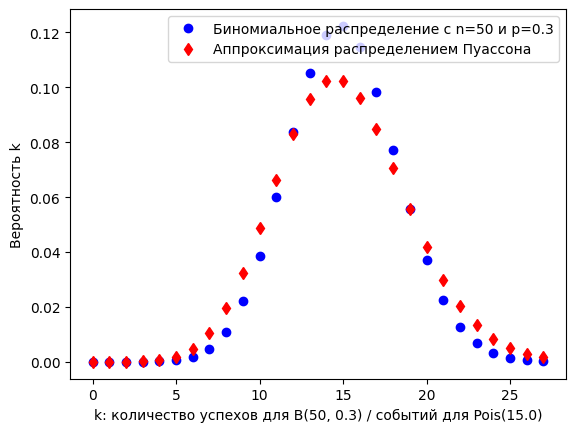

Средняя разница вероятностей на значение: 0.006063882036816821


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
 
# задаём параметры биномиального распределения
n = 50
p = 0.3
 
# считаем параметр распределения Пуассона лямбда для аппроксимации
lmbd = n * p
 
# задаём диапазон значений k для построения графика:
# добавим к мат.ожиданию биномиального распределения 4 стандартных отклонения
std_binom = np.sqrt(n * p * (1 - p))
max_value = int(n * p + 4 * std_binom)

binom_probs = []
poisson_probs = []
# для всех значений от 0 до max_value
for k in range(max_value + 1):
    # рассчитываем значения вероятности для биномиального распределения и распределения Пуассона
    binom_prob = binom.pmf(k, n, p)
    poisson_prob = poisson.pmf(k, lmbd)
    # добавляем значения в соответствующие списки
    binom_probs.append(binom_prob)
    poisson_probs.append(poisson_prob)
 
# рисуем графики
plt.plot(range(max_value + 1), binom_probs, 'bo', label=f'Биномиальное распределение с n={n} и p={p}')
plt.plot(range(max_value + 1), poisson_probs, 'rd', label='Аппроксимация распределением Пуассона')
plt.xlabel(f'k: количество успехов для B{n,p} / событий для Pois({lmbd})')
plt.ylabel('Вероятность k')
plt.legend()
plt.show()
 
# найдём суммарную ошибку аппроксимации:
error_values = []
for i in range(max_value + 1):
    error = abs(binom_probs[i] - poisson_probs[i])
    error_values.append(error)
 
print('Средняя разница вероятностей на значение:', sum(error_values) / len(error_values))

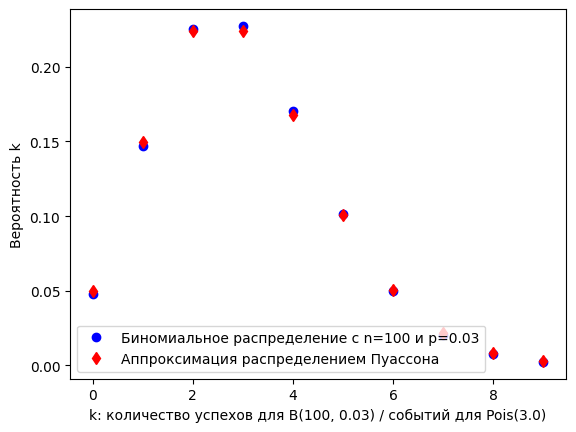

Средняя разница вероятностей на значение: 0.0014985503414719878


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
 
# задаём параметры биномиального распределения
n = 100
p = 0.03
 
# считаем параметр распределения Пуассона лямбда для аппроксимации
lmbd = n * p
 
# задаём диапазон значений k для построения графика:
# добавим к мат.ожиданию биномиального распределения 4 стандартных отклонения
std_binom = np.sqrt(n * p * (1 - p))
max_value = int(n * p + 4 * std_binom)

binom_probs = []
poisson_probs = []
# для всех значений от 0 до max_value
for k in range(max_value + 1):
    # рассчитываем значения вероятности для биномиального распределения и распределения Пуассона
    binom_prob = binom.pmf(k, n, p)
    poisson_prob = poisson.pmf(k, lmbd)
    # добавляем значения в соответствующие списки
    binom_probs.append(binom_prob)
    poisson_probs.append(poisson_prob)
 
# рисуем графики
plt.plot(range(max_value + 1), binom_probs, 'bo', label=f'Биномиальное распределение с n={n} и p={p}')
plt.plot(range(max_value + 1), poisson_probs, 'rd', label='Аппроксимация распределением Пуассона')
plt.xlabel(f'k: количество успехов для B{n,p} / событий для Pois({lmbd})')
plt.ylabel('Вероятность k')
plt.legend()
plt.show()
 
# найдём суммарную ошибку аппроксимации:
error_values = []
for i in range(max_value + 1):
    error = abs(binom_probs[i] - poisson_probs[i])
    error_values.append(error)
 
print('Средняя разница вероятностей на значение:', sum(error_values) / len(error_values))

        Чем больше число повторений и меньше вероятность успеха случайного события, тем точнее приближение (аппроксимация) рапределения Пуассона к биноминальному распределению

Пример:

Пусть на баннер обычно кликает 
1.2 % тех, кто его увидел. Компания заказала по 
1000 показов баннера в час. Какова вероятность, что за несколько часов компания получит 
70 кликов или больше?


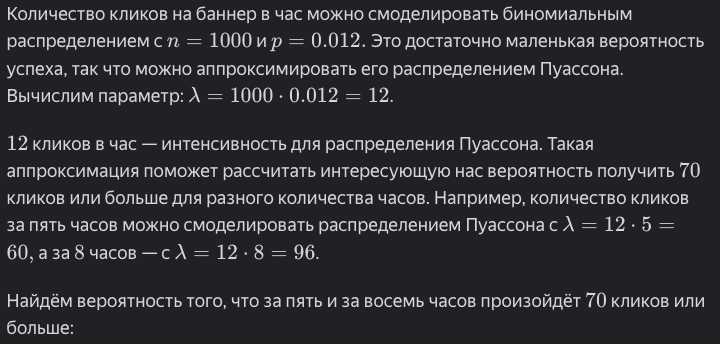

In [47]:
from scipy.stats import poisson

threshold = 70
lmbd_5 = 60
lmbd_6 = 72
lmbd_8 = 96

print('Вероятность для пяти часов:', 1 - poisson.cdf(threshold - 1, lmbd_5))
print('Вероятность для шести часов:', 1 - poisson.cdf(threshold - 1, lmbd_6))
print('Вероятность для восьми часов:', 1 - poisson.cdf(threshold - 1, lmbd_8))

Вероятность для пяти часов: 0.11178964695883675
Вероятность для шести часов: 0.6089436907468072
Вероятность для восьми часов: 0.9976588561499148


#### Аппроксимация биномиального распределения нормальным

https://practicum.yandex.ru/trainer/data-scientist/lesson/47aaa4b5-f3d4-454d-850a-72107b93d05e/

Биномиальным распределением описывается множество переменных, и часто возникает задача найти вероятность «хвоста» распределения. Например, вы заказали полтора миллиона показов баннера и знаете, что на него кликает 
2.9 % тех, кто его просмотрел. Рассчитать вероятность того, что вы получите менее 
43000 кликов, можно и с помощью биномиального распределения. Но удобнее и быстрее с точки зрения вычислений использовать нормальную аппроксимацию.

Если 
n достаточно велико, а 
p близко к 
0.5, форма графика биномиального распределения симметрична и похожа на колокол нормального распределения. При этом условии аппроксимация получится хорошей. Но какими точно должны быть «достаточно большое» 
n и «близкое к 
0.5» 
p?

#### Условие нормальной аппроксимации


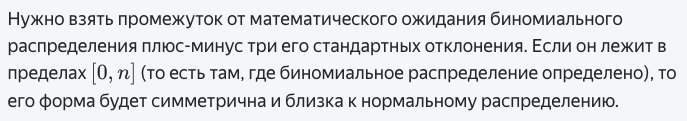

        Математическое ожидание и стандартное отклонение нормального распределения, которым аппроксимируют биномиальное, просто берутся равными мат.ожиданию и стандартному отклонению этого биномиального распределения.

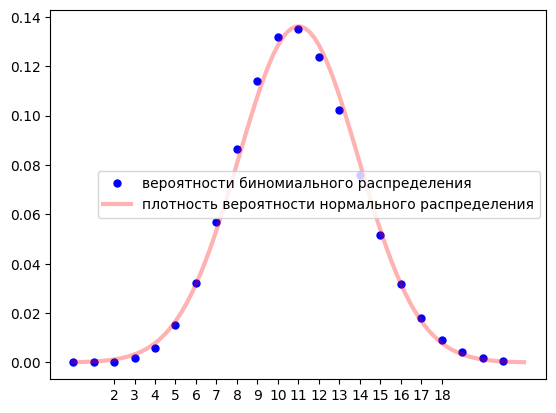

Условие выполняется


In [48]:
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
 
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 50
p = 0.22

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

Если играть со значениями вероятности и числа повторений, то будет видно, что лучше всего аппроксимация выполняется для вероятности = 0.5

Однако! 

Не стоит считать любую вероятность успеха 
p слишком далёкой от 
0.5 в отрыве от 
n. Лучше ориентируйтесь на условие аппроксимации.

Постановка задачи: 

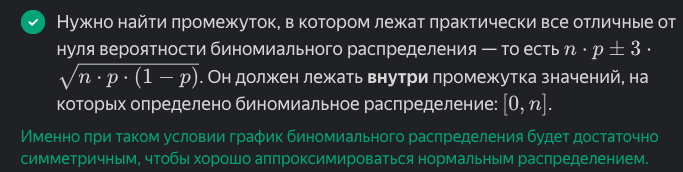

Пример: 

Если заказано полтора миллиона показов баннера и на этот баннер обычно кликает 
2.9 % от увидевших его, какова вероятность получить менее 
43000 кликов?

Аппроксимируем биномиальное распределение нормальным и посчитаем:

In [49]:
from math import sqrt
from scipy import stats as st

# задаём параметры биномиального распределения
n = 1500000
p = 0.029

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 43 тысяч
result = distr.cdf(43000)
print(result)

0.00749020311724787


Задача: 

Новые посетители, которые заходят на сайт социальной сети, заводят аккаунт с вероятностью 
11.4 %. Менеджмент соцсети прогнозирует, что в следующем месяце удастся привлечь на сайт 
550 тысяч новых посетителей. Если прогноз окажется верным, какова вероятность того, что в следующем месяце в соцсети появится больше 
63 тысяч новых аккаунтов?

In [51]:
from math import sqrt
from scipy import stats as st

n = 550_000
p = 0.114

mu = n*p
sigma = sqrt(n*p*(1-p))

distr = st.norm(mu, sigma)

result = 1- distr.cdf(63_000)
print(result)

0.10153907189350686


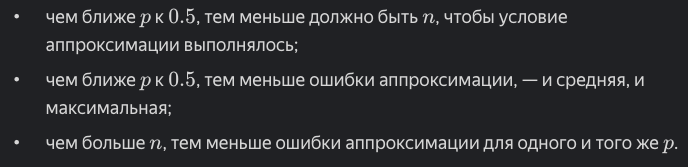

#### Итоговая информация по распределениям

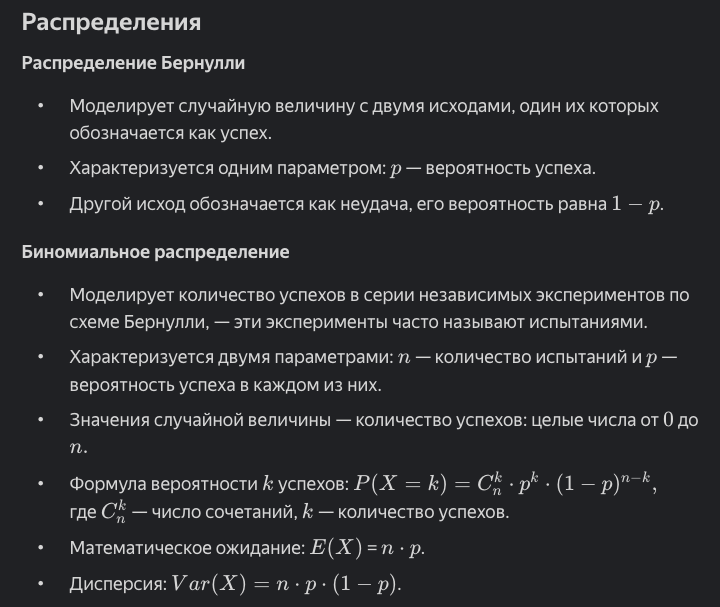

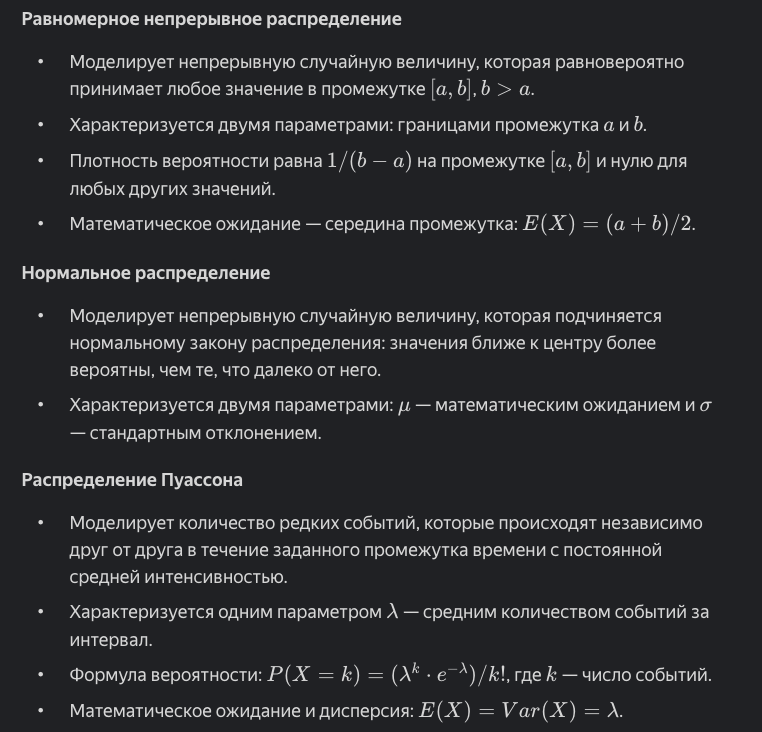

Таблица сравнений распределений

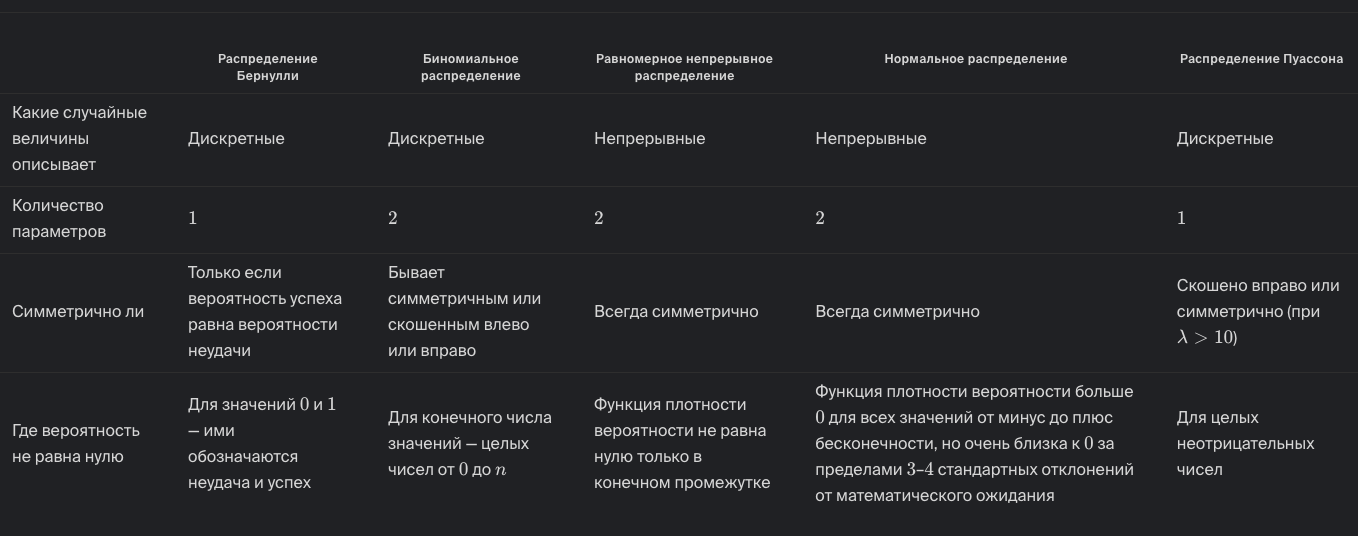

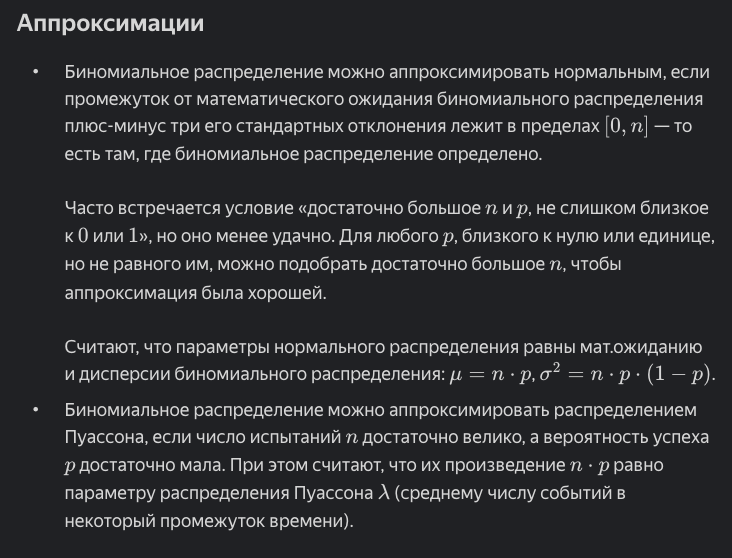

### Проверка гипотез

#### Генеральная совокупность. Случайные и стратифицированные выборки

     Главное свойство выборки — репрезентативность: способность отражать свойства генеральной совокупности.

##### Нужно ли брать несколько выборок?

Что лучше: взять одну большую выборку или несколько выборок поменьше и усреднить результаты? Разница небольшая: среднее значение одной случайной выборки размера 
n будет близко к усреднённому результату 
m случайных выборок размера 
n/m.

Однако, выборка <font color='red'>большего размера лучше подходит для проверки статистических гипотез</font>: от размера выборки зависит, насколько оценки, сделанные по выборке, будут близки к тому, что нужно по этой выборке оценить. Поэтому, если есть возможность получить больше данных, чаще делают одну выборку большего размера, чем несколько выборок поменьше.